# this code is a positive control

## I use simulation data, where Smad pathway is simulated with random noise, but gene expression depends on only on Smad dynamics

this is for figures
Dont exclude EVECS and see if that keeps you from getting redundant dimensions
So keepin every evec had no benefit really. But it looks like using a peak finder for LLR residuals really is helpful!

The big wins from this notebook: subsample evecs for LLR and bootstrap to compute a median value --> this is way faster and more accurate! Its amazing


Attempting agnostic prediction again!
OK. so just resampling raw data and zero to one scaling gets bad diffusion maps
Now I will try zero to one rescaling (sqrt) and then resampling

Concatenating absolute, gradient and integral, and then zero to one sqrt processing these concatenated trajectories worked for SYST1!!!!
NOW DO CAGA12


In [1]:
from pathlib import Path
cwd = Path().resolve()
print(cwd)

/Users/frick/Dparams/DParamsFinal_v4


In [2]:
##

In [3]:
from pathlib import Path
cwd = Path().resolve()
print(cwd)
import sys
sys.path.insert(0, cwd) 

conditionid = 'expSYST2_PC'
specid = 'mdl_S3conc_CAGAconc_gpy_-DIFF-positive_LLRpeakfinder_CLEAN-AGNOSTIC-ztosqrtResampleCAGA'
cond2 = 'tcut'
exp_path = '' + conditionid + '/'
csvsavepath = '_dmap_csv_' + conditionid + cond2+ specid + 'clean/'
print(specid)

repo = str(cwd) +'/'

data_path = repo + exp_path + "/"
data_path2 = data_path
fig_path = repo + "testfig/"

#determine data for generating input and output maps
if conditionid == 'exp4' or conditionid == 'exp3':
    params = "smadMatrix.csv"
    params2 = "outputMatrixTOTAL.csv"
    timematrix = "timematrix.csv"
    datamatrix = "dosageData.csv"
    filename = data_path + params
    tcut = 'no'
    tscale = 'no'
else:
    params = "rsmad.csv"
#     params2 = "zgene.csv"
    params2 = 'cagagene.csv'
    timematrix = "timematrix.csv"
    datamatrix = "dosageData.csv"
    filename = data_path + params
    print('it elsed')
    tcut = 'yes'
    tscale = 'yes'
    

#in this processed form, I find that using DMAPs does not improve the accuracy of representing the data above using timepoint combinations
#smad abundance vs Snail difference

#this is bad ass
from pathlib import Path
cwd = Path().resolve()
print(cwd)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as manimation
import numpy as np

import matplotlib.tri as mtri

from scipy.integrate import odeint
from scipy.integrate import complex_ode
import scipy.spatial.distance
import scipy
import scipy.interpolate
import scipy.signal

import re

from dmap_sp_chrisNEW import *

import dmap_sp_chrisNEW
import importlib
importlib.reload(dmap_sp_chrisNEW)


import os
print(not (os.path.isdir(fig_path)))
if not (os.path.isdir(fig_path)):
    print('making' + fig_path)
    os.mkdir(fig_path)

name = "16CHRIS"
%matplotlib inline

/Users/frick/Dparams/DParamsFinal_v4
mdl_S3conc_CAGAconc_gpy_-DIFF-positive_LLRpeakfinder_CLEAN-AGNOSTIC-ztosqrtResampleCAGA
it elsed
/Users/frick/Dparams/DParamsFinal_v4
False


In [4]:
from accessory import *

In [5]:

crs = open(filename, "r")
counter = 1
for columns in ( raw.strip().split() for raw in crs ):  
    if counter > 1:
        break
    counter+=1


# load data files and rescale as necessary
datamatrix_path_in = data_path + params
datamatrix_path_out = data_path + params2
timematrix_path = data_path + timematrix
dosage_path = data_path + datamatrix

observed_data_in0 = np.genfromtxt(datamatrix_path_in, missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
observed_data_out0 = np.genfromtxt(datamatrix_path_out, missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
time_data0 = np.genfromtxt(timematrix_path, missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
dosage_data = np.genfromtxt(dosage_path, missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")

In [6]:
def plot_all_doses(yset,t1,dosage_data):
    udose = np.unique(dosage_data)
    if len(udose)>10:
        dosage_data = np.round(dosage_data,1)
        udose = np.unique(dosage_data)
        print(udose)
    fig = plt.figure(figsize=(14,2))
    for i in range(len(udose)):
        u = udose[i]
        dd = np.where(dosage_data==u)
        didx = dd[0]
        ax = fig.add_subplot(1,len(udose),i+1)
        x = t1[didx,:]
        y = yset[didx,:]
        plt.plot(x.T,y.T)
        plt.ylim(np.min(yset.flatten()),np.max(yset.flatten()))
        plt.title(u)
        
    fig.subplots_adjust(wspace=0.3)
  


In [7]:
observed_data_in = observed_data_in0.copy()
observed_data_out = observed_data_out0.copy()    
time_data = time_data0.copy()
in0 = observed_data_in.copy() 
out0 = observed_data_out.copy()
t0 = time_data.copy()

if tcut == 'yes':
    tvec = t0[1,:]
    idx = (tvec<2) & (tvec>-0.5)
    t2 = (np.where(idx))[0]
    print(t2)
    observed_data_in = observed_data_in[:,t2]
    observed_data_out = observed_data_out[:,t2]  
    if tscale == 'yes':
        time_data = time_data[:,t2]*60
    else:
        time_data = time_data[:,t2]

observed_data_in[np.isnan(observed_data_in)] = 0
observed_data_out[np.isnan(observed_data_out)] = 0
print(np.sum(np.isnan(observed_data_in)))


[137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280
 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298
 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316
 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334
 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352
 353 354 355 356 357 358 359 360 361 362 363]
0


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
/Users/frick/Dparams/DParamsFinal_v4/_dmap_csv_expSYST2_PCtcutmdl_S3conc_CAGAconc_gpy_-DIFF-positive_LLRpeakfinder_CLEAN-AGNOSTIC-ztosqrtResampleCAGAclean/


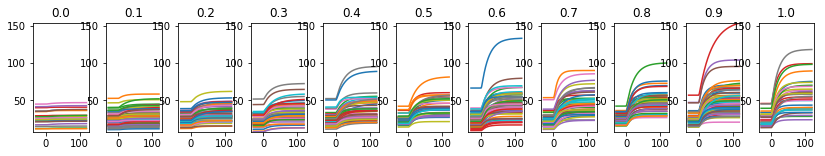

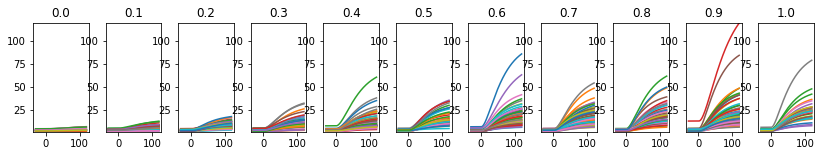

In [8]:
plot_all_doses(observed_data_in.copy(),time_data.copy(),dosage_data)  
plot_all_doses(observed_data_out.copy(),time_data.copy(),dosage_data)  

newcsvpath = repo + csvsavepath

if not os.path.exists(newcsvpath):
    os.makedirs(newcsvpath)
print(newcsvpath)
a = numpy.asarray(observed_data_in)
numpy.savetxt(newcsvpath+"smadMatrix_PYdat.csv", a, delimiter=",")
a = numpy.asarray(observed_data_out)
numpy.savetxt(newcsvpath+"outputMatrixDIFF_PYdat.csv", a, delimiter=",")
a = numpy.asarray(time_data)
numpy.savetxt(newcsvpath+"timeMatrix_PYdat.csv", a, delimiter=",")

In [9]:
def zero_one_individ(data):
    for k in range(0,data.shape[1]):   
        data[:,k] = data[:,k] - np.min(data[:,k])
        data[:,k] = data[:,k] / np.max(data[:,k])
    #     observed_data_in[:,k] = np.log(observed_data_in[:,k]+1e-0)
        data[:,k] = np.sqrt(data[:,k])
    return data

def zero_one_population(data):
    ogdingrad = data.copy()
    for k in range(0,data.shape[0]):  
        data[k,:] = data[k,:] - np.min(ogdingrad[:])
        data[k,:] = data[k,:] / (np.max(ogdingrad[:])-np.min(ogdingrad[:]))
    return data

def zero_one_dimension(data):
    ogdingrad = data.copy()
    for i in range(0,data.shape[1]):  
        dimdat = ogdingrad[:,i]
        for k in range(0,data.shape[0]):  
            data[k,i] = data[k,i] - np.min(dimdat[:])
            data[k,i] = data[k,i] / (np.max(dimdat[:])-np.min(dimdat[:]))
    return data

def zero_one_sqrt(data):
    for k in range(0,data.shape[1]):
        if np.std(data[:,k])>1e-14:
            data[:,k] = data[:,k] - np.min(data[:,k])
            data[:,k] = data[:,k] / np.max(data[:,k])
            #observed_data_out[:,k] = np.log(observed_data_out[:,k]+1e-0)
            data[:,k] = np.sqrt(data[:,k])
        else:
            print('low sqrt error at',k)
    return data



def foldchangefunc(data_in,time_in,basalwindow):
    tvec = time_in[1,:]
    tidx = ((tvec<basalwindow[1]) & (tvec>=basalwindow[0]))
    basal0 = np.where(tidx)
    basal = basal0[0]
    ogdata_in = data_in.copy()
    for k in range(0,data_in.shape[0]):  
        data_in[k,:] = data_in[k,:]/np.median(ogdata_in[k,basal])
    return data_in   
    
    

def differencefunc(data_in,time_in,basalwindow):
    tvec = time_in[1,:]
    tidx = ((tvec<basalwindow[1]) & (tvec>=basalwindow[0]))
    basal0 = np.where(tidx)
    basal = basal0[0]
    ogdata_in = data_in.copy()
    for k in range(0,data_in.shape[0]):  
        data_in[k,:] = data_in[k,:]-np.median(ogdata_in[k,basal])
    return data_in   



def resampledata(data_in,time_in,gradcut,rlh):
    tvec = time_in[1,:]

#     tvec = time_data[1,:]-np.min(time_data[1,:])
    pt = np.gradient(data_in.copy(),tvec,axis=1)
    pt = np.gradient(pt,tvec,axis=1)
    pt = np.abs(pt)
    pt = np.median(pt,axis=0)
    pt = (pt-np.min(pt))/(np.percentile(pt,95)-np.min(pt))
    plt.semilogy(pt.T)
    plt.semilogy([0,len(pt)],[gradcut,gradcut])
    plt.ylim(1e-9,10)
    plt.show()

    firstT = np.where(pt>gradcut)
    tx = firstT[0]
    tx1i = np.max((tx[0]-1,0))
    tx2i = tx[-1]
    print([tx1i,tx2i])
    tkeep = [tx1i,tx2i]
    
    lowreg = rlh[0] #every 60 minutes
    highreg = rlh[1] #every 10 minutes
    
    treg = np.ceil((tvec[tkeep[0]]-tvec[0])/lowreg)
    tinterp1 = np.linspace(tvec[0],tvec[tkeep[0]],treg)
    
    treg = np.ceil((tvec[tkeep[1]]-tvec[tkeep[0]+1])/highreg)
    tinterp2 = np.linspace(tvec[tkeep[0]+1],tvec[tkeep[1]],treg)
    
    treg = np.ceil((tvec[-1]-tvec[tkeep[1]+1])/lowreg)
    tinterp3 = np.linspace(tvec[tkeep[1]+1],tvec[-1],treg)
    tinterp = np.hstack((tinterp1,tinterp2,tinterp3))
    print(tinterp)
    
    keep_in = data_in.copy()
    x = tinterp
    time_datanew = np.zeros((keep_in.shape[0],len(x)))
    obsdnew = np.zeros((keep_in.shape[0],len(x)))
    for k in range(0,data_in.shape[0]): 
        xp = time_in[k,:]
        fp = keep_in[k,:]
        yp = numpy.interp(x, xp, fp, left=None, right=None, period=None)
        obsdnew[k,:] = yp
        time_datanew[k,:] = x

    data_out = obsdnew
    time_out = time_datanew
    

    return data_out, time_out

In [10]:
# pvec = observed_data_in[1,:]
# tvec = time_data[1,:]-np.min(time_data[1,:])
# print(tvec.shape)
# print(pvec.shape)
# deriv = np.gradient(pvec.copy(),tvec)
# gradi = np.gradient(pvec.copy())
# plt.plot(deriv)
# plt.plot(gradi)

In [11]:
# pvec = observed_data_in[1,:]
# tvec = time_data[1,:]-np.min(time_data[1,:])
# print(tvec.shape)
# print(pvec.shape)
# deriv = np.gradient(observed_data_in.copy(),tvec,axis=1)
# gradi = np.gradient(observed_data_in.copy(),axis=1)
# plt.plot(deriv.T,'k-')
# plt.plot(gradi.T,'r-')
# plt.show()

In [12]:
print('observed_data_in', observed_data_in.shape)
print('observed_data_out', observed_data_out.shape)
print('time_data', time_data.shape)
ogdin = observed_data_in.copy()
ogdout = observed_data_out.copy()
# tvec = time_data[1,:]
# print(tvec)

observed_data_in (500, 227)
observed_data_out (500, 227)
time_data (500, 227)


In [13]:
# # compute fold change
# basalwindow = [-30,0]
# data_in = observed_data_in.copy()
# time_in = time_data
# # observed_data_in = foldchangefunc(data_in,time_in,basalwindow)

# #compute gradient
# data_in = observed_data_in.copy()
# tvec = time_in[1,:]
# # observed_data_in = np.gradient(observed_data_in.copy(),tvec,axis=1)
# # observed_data_in = np.gradient(data_in,axis=1)

# #compute difference
# basalwindow = [-30,0]
# data_in = observed_data_out.copy()
# time_in = time_data
# # observed_data_out = differencefunc(data_in,time_in,basalwindow)


# observed_data_in = zero_one_sqrt(observed_data_in)
# observed_data_out = zero_one_sqrt(observed_data_out)

# time_data_in = time_in.copy()
# data_in = observed_data_in.copy()
# time_in = time_data
# gradcut = 0.1
# resamplelohi = [20,3]
# observed_data_in, time_data_in = resampledata(data_in,time_in,gradcut,resamplelohi)
    
# time_data_out = time_in.copy()
# data_in = observed_data_out.copy()
# time_in = time_data
# gradcut = 0.1
# resamplelohi = [20,3]
# observed_data_out, time_data_out = resampledata(data_in,time_in,gradcut,resamplelohi)


# # observed_data_in = zero_one_population(observed_data_in)
# # observed_data_out = zero_one_population(observed_data_out)

# # observed_data_in = zero_one_sqrt(observed_data_in)
# # observed_data_out = zero_one_sqrt(observed_data_out)

# print('done')

In [14]:

def stackABS_GRAD_INT(observed_data_in,time_in):
    for v in range(0,3):
        if v == 0:        
            data_in = observed_data_in.copy()
            time_in = time_data
            observed_data_in1 = data_in
        if v == 1:
            # compute gradient
            data_in = observed_data_in.copy()
            time_in = time_data
            tvec = time_in[1,:]
            observed_data_in2 = np.gradient(observed_data_in.copy(),tvec,axis=1)
        if v == 2:
            # compute fold change
            data_in = observed_data_in.copy()
            time_in = time_data
            tvec = time_in[1,:]
            observed_data_in3 = np.cumsum(observed_data_in.copy(),axis=1)
#             ocin = observed_data_in.copy()
#             for i in range(ocin.shape[0]):
#                 outty = [np.trapz(ocin[i,0:vv+1],tvec[0:vv+1],axis=1) for vv in range(ocin.shape[1])]
#                 print(outty)
#                 observed_data_in3[i,:] = outty
#             print(observed_data_in3)
            
    print(observed_data_in1.shape)
    print(observed_data_in2.shape)
    print(observed_data_in3.shape)
    datanew = np.hstack((observed_data_in1,observed_data_in2,observed_data_in3))
    time_data1 = time_data.copy() - np.min(time_data[:])
    time_data2 = time_data1.copy() + np.max(time_data1[:])
    time_data3 = time_data1.copy() + np.max(time_data2[:])
    timenew = np.hstack((time_data1,time_data2,time_data3))
    return datanew,timenew

time_in = time_data.copy()
observed_data_in,time_data_in = stackABS_GRAD_INT(observed_data_in.copy(),time_in.copy())
time_in = time_data.copy()
observed_data_out,time_data_out = stackABS_GRAD_INT(observed_data_out.copy(),time_in.copy())
print('done')

observed_data_in = zero_one_sqrt(observed_data_in)
observed_data_out = zero_one_sqrt(observed_data_out)

(500, 227)
(500, 227)
(500, 227)
(500, 227)
(500, 227)
(500, 227)
done
low sqrt error at 227
low sqrt error at 228
low sqrt error at 229
low sqrt error at 230
low sqrt error at 231
low sqrt error at 232
low sqrt error at 233
low sqrt error at 234
low sqrt error at 235
low sqrt error at 236
low sqrt error at 237
low sqrt error at 238
low sqrt error at 239
low sqrt error at 240
low sqrt error at 241
low sqrt error at 242
low sqrt error at 243
low sqrt error at 244
low sqrt error at 245
low sqrt error at 246
low sqrt error at 247
low sqrt error at 248
low sqrt error at 249
low sqrt error at 250
low sqrt error at 251
low sqrt error at 252
low sqrt error at 253
low sqrt error at 254
low sqrt error at 255
low sqrt error at 256
low sqrt error at 257
low sqrt error at 258
low sqrt error at 259
low sqrt error at 260
low sqrt error at 261
low sqrt error at 262
low sqrt error at 263
low sqrt error at 264
low sqrt error at 265
low sqrt error at 266
low sqrt error at 267
low sqrt error at 268
low s

In [15]:
tvec = time_data[1,:]
datain = np.hstack([observed_data_in])
dataout = np.hstack([observed_data_out]) #hstack does horzcat in matlab, and in this case it does nothing
print(datain.shape)

(500, 681)


0
0


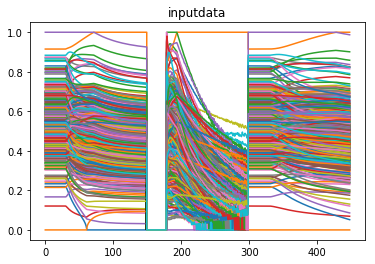

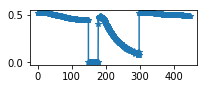

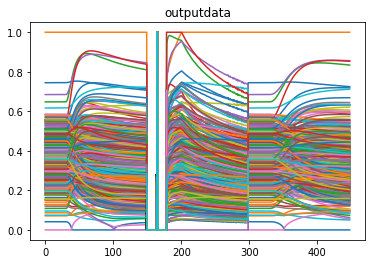

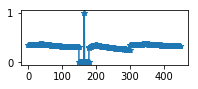

In [16]:
print(np.sum(np.isnan(datain[:])))
print(np.sum(np.isnan(dataout[:])))

plt.plot(time_data_in.T,datain.T)
plt.title('inputdata')
plt.show()

tvec = time_data_in[1,:]
dt = np.median(datain,axis=0)
plt.figure(figsize=(3,1))
plt.plot(tvec,dt,'-*')
plt.show()

plt.plot(time_data_out.T,dataout.T)
plt.title('outputdata')
plt.show()

tvec = time_data_out[1,:]
dt = np.median(dataout,axis=0)
plt.figure(figsize=(3,1))
plt.plot(tvec,dt,'-*')
plt.show()

In [17]:
##########################################################################################
def eigcut(evals,evecs,eps,cut):   
    eigen_val_in = np.exp(np.log(evals)/np.median(eps))
    eidx = np.where(eigen_val_in>cut)
    
    ff = eidx[0]
    if len(ff)<4:
        ff = [0,1,2,3,4,5]
#     plt.semilogy(eigen_val_in[0::],'r')
#     plt.show()
#     print(eidx)
#     ppo
    return ff
        
def inoutdmap(datain,dataout,epsfactin,epsfactout):
    import sklearn.metrics as sm
    data = datain.copy()
    dist_true = sm.pairwise_distances(data,metric = 'euclidean')
    meddist_in = np.median(dist_true)
    print('meddist_in',meddist_in)

    data = dataout.copy()
    dist_true = sm.pairwise_distances(data,metric = 'euclidean')
    meddist_out = np.median(dist_true)
    print('meddist_out',meddist_out)
    print(dist_true.shape)
    ein = {}
    eout ={}
    numcut = {}
    numcutsmad={}
    numcutsnail={}
    
    
    data_type = "compute dmatrix"
    n_evecs = 30
    LB_flag = 1
    state_dependent_eps = True
    cutoff_num=-1
    estimate_eps = False
    verbose=False
    for i in range(0,len(epsfactin)):
    
    
        epsf = epsfactin[i].copy()
        data = datain.copy()
#         epsilon = meddist_in*epsf
        epsilon = epsf
    
        # get input data dmaps
        evecs_in,evals_in,_,_,_,eps_in  = dmap_sp(data,epsilon,
                                            n_evecs,LB_flag,data_type,
                                            estimate_eps=estimate_eps,
                                            cutoff_num=cutoff_num,
                                            state_dependent_eps=state_dependent_eps,verbose=verbose)


        data = dataout.copy()
#         epsilon = meddist_out*epsf
        epsilon = epsfactout[i].copy()

        # get output data dmaps
        evecs_out,evals_out,_,_,_,eps_out = dmap_sp(data,epsilon,
                                            n_evecs,LB_flag,data_type,
                                            estimate_eps=estimate_eps,
                                            cutoff_num=cutoff_num,
                                            state_dependent_eps=state_dependent_eps,verbose=verbose)


        cut_in = (1*(10**(-18)))
        eidx = eigcut(evals_in,evecs_in,eps_in,cut_in)
        ein[i] = [evecs_in[:,eidx],evals_in[eidx],eps_in[eidx],1]
        numcutsmad[i] = (evecs_in[:,eidx]).shape[1]
        
        eidx = eigcut(evals_out,evecs_out,eps_out,cut_in)
        eout[i] = [evecs_out[:,eidx],evals_out[eidx],eps_out[eidx],1]
        numcutsnail[i] = (evecs_out[:,eidx]).shape[1]
        
#         ein[i] = [evecs_in,evals_in,eps_in,1]
#         eout[i] = [evecs_out,evals_out,eps_out,1]
#         numcutsmad[i] = (evecs_in).shape[1]
#         numcutsnail[i] = (evecs_out).shape[1]

        print('i=', str(i),end=" ")
    print('done')  
    numcut['smad']=numcutsmad
    numcut['snail']=numcutsnail
    return eout,ein,numcut 

In [18]:
# import importlib
importlib.reload(dmap_sp_chrisNEW)
num_eps=40

emin,emax = epsminmax(datain)
epsfactin = np.logspace(np.log10(emin/1.2),np.log10(emax*4),num_eps)
emin,emax = epsminmax(dataout)
epsfactout = np.logspace(np.log10(emin/1.2),np.log10(emax*4),num_eps)
# epsfactin = np.sort(np.hstack((epsfactin,0.23263767063348123)))
eout,ein,numcut = inoutdmap(datain,dataout,epsfactin,epsfactout)


# epsfactout = np.sort(np.hstack((epsfactout,0.7561109439140727)))
# eout,toss,epsfact,numcut = inoutdmap(dataout,dataout,epsfactout)

dmin= 8.368946484289514
dmax= 22.78868851994214
eps_min= 3.0417666417630604
eps_max= 22.55396884306528
dmin= 10.272190766556578
dmax= 24.251961237869743
eps_min= 4.582584307767126
eps_max= 25.54336105417744
meddist_in 3.633317332012357
meddist_out 3.2420019724135187
(500, 500)
i= 0 i= 1 i= 2 i= 3 i= 4 i= 5 i= 6 i= 7 i= 8 i= 9 i= 10 i= 11 i= 12 i= 13 i= 14 i= 15 i= 16 i= 17 i= 18 i= 19 i= 20 i= 21 i= 22 i= 23 i= 24 i= 25 i= 26 i= 27 i= 28 i= 29 i= 30 i= 31 i= 32 i= 33 i= 34 i= 35 i= 36 i= 37 i= 38 i= 39 done


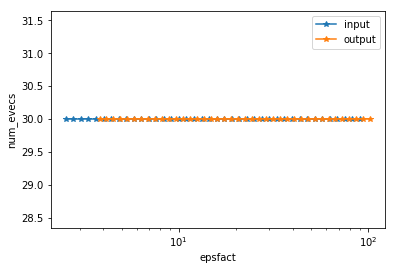

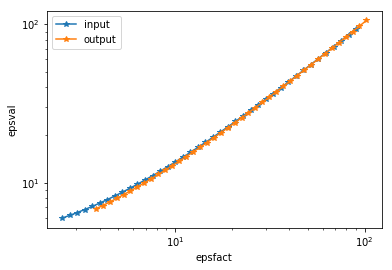

In [19]:
plt.semilogx(epsfactin,numcut['smad'].values(),'-*')
plt.semilogx(epsfactout,numcut['snail'].values(),'-*')
plt.xlabel('epsfact')
plt.ylabel('num_evecs')
plt.legend(['input','output'])
plt.show()

epsz = [eout[x] for x in range(len(eout))]
epsz2 = [np.median((epsz[x])[2]) for x in range(len(epsz))]

epszi = [ein[x] for x in range(len(ein))]
epszi2 = [np.median((epszi[x])[2]) for x in range(len(epszi))]

plt.loglog(epsfactin,epszi2,'-*')
plt.loglog(epsfactout,epsz2,'-*')
plt.xlabel('epsfact')
plt.ylabel('epsval')
plt.legend(['input','output'])
plt.show()
# epsfact = np.logspace(np.log10(0.005),np.log10(6),num_eps)
# eout,toss,epsfact,numcut = inoutdmap(datain,dataout,epsfact)
# plt.plot(numcut.values())
# plt.show()

# make sure you get the same result from algorithm and from non-algorithm DMAP_SP first!
see Dparams/DParamsFinal_v3/usingSameEpsilon_IgetsameEVECS_IN-and-EV_IN in algorithm or in plain DMAP_SP.ipynb for verification of this


In [20]:
#try a new method where you compute dimensionality using LLR (local linear regression)
import GPy

##########################################################################################
def eigcut(evals,evecs,eps,cut):   
    eigen_val_in = np.exp(np.log(evals)/np.median(eps))
    eidx = np.where(eigen_val_in>cut)
    
    ff = eidx[0]
    if len(ff)<4:
        ff = [0,1,2,3,4,5]
#     plt.semilogy(eigen_val_in[0::],'r')
#     plt.show()
#     print(eidx)
#     ppo
    return ff
        
def initaccstro(ndims,euse):
    accL = {}
    for ijk in range(0,ndims):
        accL[ijk] = {}
    for ajk in range(0,len(eout)):
        for v in range(0,ndims):
            accstri = accL[v]
            accstri[ajk] = np.array([0,0])
            accL[v]=accstri
    
    return accL


def Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr):
    kerndim = X.shape[1]
    ker = GPy.kern.Matern52(kerndim,ARD=True) + GPy.kern.White(kerndim)

    # create simple GP model
    m = GPy.models.GPRegression(X,Y,ker)

    # optimize and plot
    m.optimize(messages=messages,max_f_eval = max_f_eval)
    return m
    
def Gpy_mse_plot(m,X,Y,inputstr,outputstr,ploton):
    xp,xstd = m.predict(X)

    
    x1,y1, mse, mseeach = msefunc(xp,Y)
    if ploton==True:
        for i in range(0,x1.shape[1]):
            fig = plt.figure(figsize=(2,2))
            plt.scatter(x1[:,i],y1[:,i],c='k',marker='.')
            plt.xlabel('orig.' + outputstr)
            plt.ylabel('pred.' + outputstr)
            plt.title('predict ' + outputstr + ' based on ' + inputstr + ', rescaled')
            plt.show()
            print('rescaled mse = ',mse)
            print(mseeach.values())
#     print(mseeach)    
    mseeach2 = np.nanmedian(np.array(list(mseeach.values())))
    mseeach3 = np.nansum(np.array(list(mseeach.values())))
    mseeach4 = np.nanmin(np.array(list(mseeach.values())))
    return mseeach2,  mseeach3, mseeach4

def msefunc(xp,Y):
    mseeach={}
    Yscale = np.zeros(Y.shape)
    xpscale = np.zeros(Y.shape)
    for i in range(0,Y.shape[1]):
        Yscale[:,i] = (Y[:,i]-np.mean(Y[:,i]))/np.std(Y[:,i])
        xpscale[:,i] = (xp[:,i]-np.mean(xp[:,i]))/np.std(xp[:,i])
        mseeach[i]=np.mean((Yscale[:,i]-xpscale[:,i])**2)
    scalex = xpscale
    scaley = Yscale
    mse = np.mean((Yscale-xpscale)**2)
    return scalex,scaley, mse, mseeach




def accmultidim9(datatest,eout,smadsnail,ndims,promval):
    # from dmap_sp_chrisNEW import compute_residualsNEW
    import dmap_sp_chrisNEW
    import importlib
    import GPy
    
    importlib.reload(dmap_sp_chrisNEW)

    k=5
    ev_i = [0,1]
    seedval =16
#     accvalo = np.zeros((len(eout)))
    dimaccval = np.zeros((ndims,len(eout)))
    
    #initialize
    dimstringall = initaccstro(ndims,eout)
    dimstring1 = initaccstro(ndims,eout)
    dimstring2 = initaccstro(ndims,eout)

    for a in range(len(eout)):
        evecs_in = eout[a][0]
        evals_in = eout[a][1]
        eps_in = eout[a][2]

        #accuracy in 3 dimensions
        evecs_test = shaver(evecs_in,evals_in,eps_in)
        print('a=',a,' /', np.sum(np.isinf(np.abs(evecs_test[:])))==0)
        if np.sum(np.isinf(np.abs(evecs_test[:])))==0:
            
            msekeeper={}
            ressy1 = np.zeros((evecs_in.shape[1]))
            evs0 = evecs_in.shape[0]
            subsampsize = np.min((evs0,50))# define a subsampling option
            sampiter=20
            rrr1 = np.zeros((sampiter,evecs_in.shape[1]))
            for si in range(sampiter):
                subsamp = numpy.random.randint(0, high=evs0, size=subsampsize, dtype='l')
                rrr0 = compute_residualsNEW(evecs_in[subsamp,:], eps_scale=3, progressBar=True, skipFirst=True, bandwidth_type='median')
                rrr1[si,:] = np.asarray(list(rrr0['Residuals'])).reshape(-1,)
            rrr = np.median(rrr1,axis=0)
            
#             plt.plot(rrr1.T)
#             plt.show()
#             plt.plot(rrr)
#             plt.show()
            
            
#             rrr0 = compute_residualsNEW(evecs_in, eps_scale=3, progressBar=True, skipFirst=True, bandwidth_type='median')
#             rrr = rrr0['Residuals']
#             plt.plot(rrr)
#             plt.show()
#             kill = lop
#             chosenimensiontuple = np.where(rrr>0.1)
            chosenimensiontuple,properties = scipy.signal.find_peaks(rrr, height=None, threshold=None, distance=None, prominence=promval, width=None, wlen=None, rel_height=0.5, plateau_size=None)

#             print(accstr2M[0])
            chosenimensions = [np.asarray(chosenimensiontuple).reshape(-1,)]
    
            bestdimsdescent = np.argsort(rrr)
            bestdimsall = bestdimsdescent[::-1]

            #use Smad Manifold to predicut Smad trajectories (1 timepoint)
            # sample inputs and outputs
            inputstr = 'smad dmaps'
            outputstr = 'median'
            X = evecs_in[:,chosenimensions[0]]
            
            max_f_eval = 1000
            messages=False
            Yin = datatest.copy()
            Y = Yin
            
            m = Gpymadness(X[subsamp,:],Y[subsamp,:],messages,max_f_eval,inputstr,outputstr)
            mseeach2,mseeach3,mseeach4 = Gpy_mse_plot(m,X,Y,inputstr,outputstr,False)
            outputstr = 'median'
            msekeeper[outputstr]=mseeach2
#             outputstr = 'sum'
#             msekeeper[outputstr]=mseeach3
#             outputstr = 'min'
#             msekeeper[outputstr]=mseeach4

            lk = list(msekeeper.keys())
            v=0
            for v in range(0,np.min([len(lk),len(bestdimsall)])):
                bestdimsub=bestdimsall[0:(v+1)]
                print(lk[v])
#                 msekeeper[lk[v]]
                accval = np.array(msekeeper[lk[v]]).sum()
                dimaccval[v,a]=accval
                
                #store the dimensions in order of importance (as determined by LLR)
                accstri0 = dimstringall[v]
                accstri0[a] = bestdimsub
                dimstringall[v]=accstri0
                
                #store the residuals (as determined by LLR)
                accstri1 = dimstring1[v]
                accstri1[a] = rrr
                dimstring1[v]=accstri1

                
                #store the good dimensions (as determined by LLR res>cut)
                accstri2 = dimstring2[v]
                accstri2[a] = chosenimensions[0]
                dimstring2[v] = accstri2

    print('done')
    return dimaccval,dimstringall,dimstring1,dimstring2


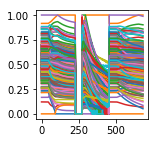

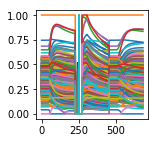

In [21]:
plt.figure(figsize=(2,2))
plt.plot(observed_data_in.T)
plt.show()

plt.figure(figsize=(2,2))
plt.plot(observed_data_out.T)
plt.show()

In [22]:
def removeAllzerotpoints(data):
    for k in range(0,data.shape[1]):
        if np.std(data[:,k])>1e-14:
            nl=1
#             print(k,',',end="")
#             data[:,k] = data[:,k] - np.min(data[:,k])
#             data[:,k] = data[:,k] / np.max(data[:,k])
#             #observed_data_out[:,k] = np.log(observed_data_out[:,k]+1e-0)
#             data[:,k] = np.sqrt(data[:,k])
        else:
            data[:,k] = np.nan
    
    nansum = np.sum(np.isnan(data),axis=0)
#     print(nansum.shape)
    nonanloc = np.where(nansum==0)[0]
    data=data[:,nonanloc]
    
    return data

(500, 637)


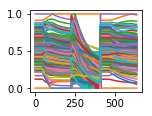

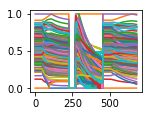

In [23]:
testout = removeAllzerotpoints(observed_data_in.copy())
print(testout.shape)
plt.figure(figsize=(2,1.5))
plt.plot(testout.T)
plt.show()
plt.figure(figsize=(2,1.5))
plt.plot(observed_data_in.T)
plt.show()


In [24]:
print(observed_data_in.shape)
def reducedimensionalityforGPy(observed_data_in):
    if observed_data_in.shape[1]>50:
        uclresampz = np.unique(np.ceil(np.linspace(1,observed_data_in.shape[1]-1,50)))
        uclresamp = [int(x) for x in list(uclresampz)]
        observed_data_in = observed_data_in[:,uclresamp]
#         print(observed_data_in.shape)
    return observed_data_in.copy()

datatest = removeAllzerotpoints(reducedimensionalityforGPy(observed_data_in))
print(datatest.shape)

(500, 681)
(500, 47)


In [25]:
seedval=2
ndims=4
smadsnail = 'smad'
datatest = removeAllzerotpoints(reducedimensionalityforGPy(observed_data_in))
euse = ein.copy()
promval = 0.05
accvali2,accstri20,accstri21,accstri22= accmultidim9(datatest,euse,smadsnail,ndims,promval)


a= 0  / True
median
a= 1  / True
median
a= 2  / True
median
a= 3  / True
median
a= 4  / True
median
a= 5  / True
median
a= 6  / True
median
a= 7  / True
median
a= 8  / True
median
a= 9  / True
median
a= 10  / True
median
a= 11  / True
median
a= 12  / True
median
a= 13  / True
median
a= 14  / True
median
a= 15  / True
median
a= 16  / True
median
a= 17  / True
median
a= 18  / True
median
a= 19  / True
median
a= 20  / True
median
a= 21  / True
median
a= 22  / True
median
a= 23  / True
median
a= 24  / True
median
a= 25  / True
median
a= 26  / True
median
a= 27  / True
median
a= 28  / True
median
a= 29  / True
median
a= 30  / True
median
a= 31  / True
median
a= 32  / True
median
a= 33  / True
median
a= 34  / True
median
a= 35  / True
median
a= 36  / True
median
a= 37  / True
median
a= 38  / True
median
a= 39  / True
median
done


In [26]:
smadsnail = 'snail'
datatest = removeAllzerotpoints(reducedimensionalityforGPy(observed_data_out))
euse = eout.copy()
promval=0.05
accvalo2,accstro20,accstro21,accstro22 = accmultidim9(datatest,euse,smadsnail,ndims,promval)

a= 0  / True
median
a= 1  / True
median
a= 2  / True
median
a= 3  / True
median
a= 4  / True
median
a= 5  / True
median
a= 6  / True
median
a= 7  / True
median
a= 8  / True
median
a= 9  / True
median
a= 10  / True


 /Users/frick/anaconda/lib/python3.6/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /Users/frick/anaconda/lib/python3.6/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add


median
a= 11  / True
median
a= 12  / True
median
a= 13  / True
median
a= 14  / True
median
a= 15  / True
median
a= 16  / True
median
a= 17  / True
median
a= 18  / True
median
a= 19  / True
median
a= 20  / True
median
a= 21  / True
median
a= 22  / True
median
a= 23  / True
median
a= 24  / True
median
a= 25  / True
median
a= 26  / True
median
a= 27  / True
median
a= 28  / True
median
a= 29  / True
median
a= 30  / True
median
a= 31  / True
median
a= 32  / True
median
a= 33  / True
median
a= 34  / True
median
a= 35  / True
median
a= 36  / True
median
a= 37  / True
median
a= 38  / True
median
a= 39  / True
median
done


In [27]:
session_name = 'sesh_'+str(num_eps)+'smadEPS'+str(num_eps)+'snailEPS'


##########################   EXPORT ########################
import dill as pickle;
from pathlib import Path
# import os

# cwd = Path().resolve()
# print(cwd)
# repo = str(cwd) +'/'

session_savepath = 'session' + conditionid + specid + 'clean/'
session_path = repo + session_savepath

print(not (os.path.isdir(session_path)))
if not (os.path.isdir(session_path)):
    print('making' + session_path + '...')
    os.mkdir(session_path)


savename = session_path + session_name

pickle.dump_session(savename)
print('pickle success!!!')

# ########################  IMPORT   ############################
# import dill as pickle;
# from pathlib import Path

# cwd = Path().resolve()
# print(cwd)
# repo = str(cwd) +'/'

# session_savepath = 'session' + conditionid + specid + 'clean/'
# session_path = repo + session_savepath
# savename = session_path + session_name


# pickle.load_session(savename)
# print(ev_in)

True
making/Users/frick/Dparams/DParamsFinal_v4/sessionexpSYST2_PCmdl_S3conc_CAGAconc_gpy_-DIFF-positive_LLRpeakfinder_CLEAN-AGNOSTIC-ztosqrtResampleCAGAclean/...
pickle success!!!


In [28]:


def plotaccmultidim7(accy,euse,acclab,ndims,smadsnail,epsfact):
    fontsize = 14
    labelsv0 = list(acclab[0].values())
    labelsv  = [labelsv0[x] for x in range(0,len(labelsv0))]
    dimlist = [len(x) for x in labelsv]
    ndims = np.max(dimlist)
    ndimsmin = np.min(dimlist)
    accy0 = accy[0].reshape(-1,)
    legstr={}
    fig = plt.figure(figsize=(9,3))
    for v in range(ndimsmin-1,ndims):
        idx = np.where(np.asarray(dimlist).reshape(-1,) == v+1)[0]
        legstr[v] = str(v+1)+' dim'
#         labelsv0 = list(acclab[v].values())
#         labelsv  = [labelsv0[x] for x in idx]
        
        plt.semilogy(idx+(0.01*v),accy0[idx],'o')
    plt.xticks(ticks=range(0,len(accy0[:])), labels=labelsv, rotation=90)
    plt.xlabel('DMAP dims',fontsize=fontsize)
    plt.ylabel('mse of data prediction',fontsize=fontsize)
    plt.title('assessing dimensionality and quality of '+smadsnail + ' dmaps for varying epsilons')
    plt.ylim(np.min(accy0[:]),np.max((np.max(accy0[:]),1)))
    plt.legend(list(legstr.values()))    
    plt.show()
    
    fig = plt.figure(figsize=(9,3))
    legstr={}
    ra = range(accy.shape[0])
    for vi in ra[0::]:
#         eppx = [np.median(euse[i][2]) for i in range(0,len(euse))]
        plt.loglog(epsfact,accy[vi,:],'o-')
#         legstr[vi] = [str(vi+1)+'dim']

    plt.legend(['median'])
    # plt.xticks(ticks=range(0,len(accval4)), labels=accstr4.values(), rotation=90)
    plt.xlabel('epsilon',fontsize=fontsize)
    plt.ylabel('mse of data prediction',fontsize=fontsize)
    plt.title('assessing dimensionality and quality of '+smadsnail + ' dmaps for varying epsilons')
    plt.ylim(np.min(accy[:]),np.max((np.max(accy[:]),1)))
    plt.show()

    
    fig = plt.figure(figsize=(9,3))
    legstr={}
    ra = range(accy.shape[0])
    for vi in ra[0::]:
        eppx = [np.median(euse[i][2]) for i in range(0,len(euse))]
        plt.loglog(eppx,accy[vi,:],'*-')
#         legstr[vi] = [str(vi+1)+'dim']

    plt.legend(['median'])
    # plt.xticks(ticks=range(0,len(accval4)), labels=accstr4.values(), rotation=90)
    plt.xlabel('epsilon',fontsize=fontsize)
    plt.ylabel('mse of data prediction',fontsize=fontsize)
#     plt.title(smadsnail + ' accuracy',fontsize=fontsize)
    plt.title('assessing dimensionality and quality of '+smadsnail + ' dmaps for varying epsilons')
    plt.ylim(np.min(accy[:]),np.max((np.max(accy[:]),1)))
    plt.show()
    

 /Users/frick/anaconda/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning:elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


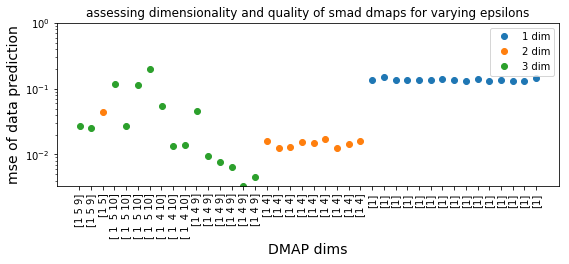

 /Users/frick/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:1479: UserWarning:Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


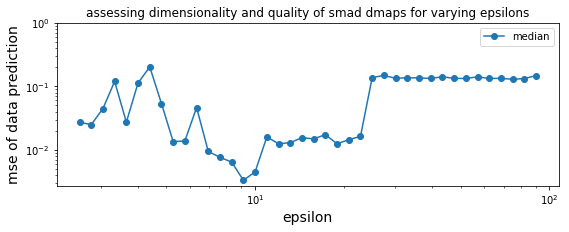

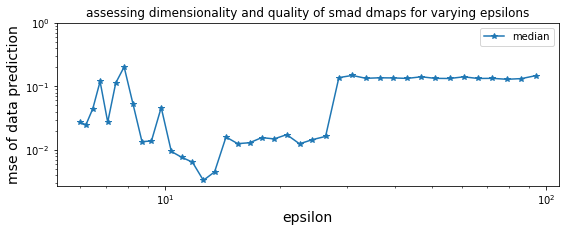

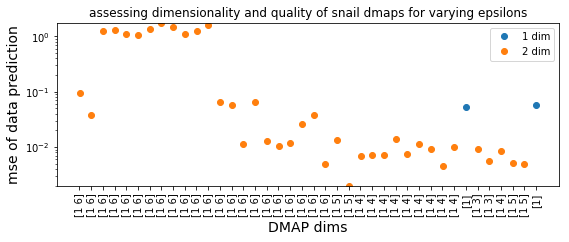

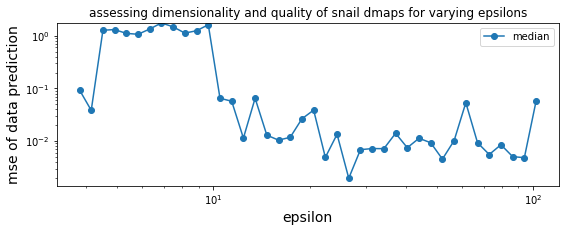

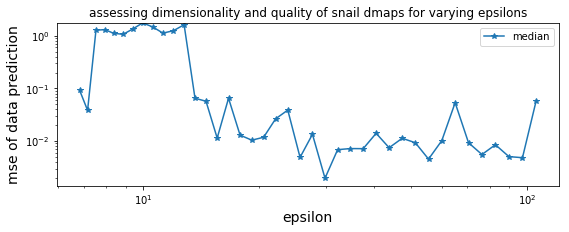

In [29]:
accy = accvali2.copy()
euse = ein.copy()
acclab = accstri22.copy()
smadsnail = 'smad'
plotaccmultidim7(accy,euse,acclab,ndims,smadsnail,epsfactin)

accy = accvalo2.copy()
euse = eout.copy()
acclab = accstro22.copy()
smadsnail = 'snail'
plotaccmultidim7(accy,euse,acclab,ndims,smadsnail,epsfactout)


In [30]:

def manifoldgrabber(acclab,euse,smadsnail,accy,accvals,accuracycutoff):
    acl = acclab[0]
    acllist = list(acl.values())
    dimlist = [len(x) for x in acllist]
    ndims = np.max(dimlist)
    ndimsmin = np.min(dimlist)
    accy0 = accy[0].reshape(-1,)
    accuracyForGivenDimensions={}
    for v in range(ndimsmin-1,ndims):
        idx = np.where(np.asarray(dimlist).reshape(-1,) == v+1)[0]
        if len(idx)>0:
            bestones = [np.argmin(accvals[idx])]
            accuracyForGivenDimensions['dim'+str(v+1)+'accvals'] =accvals[idx]
            accuracyForGivenDimensions['dim'+str(v+1)+'indices'] = idx
            accuracyForGivenDimensions['dim'+str(v+1)+'best'] = idx[bestones]
            accuracyForGivenDimensions['dim'+str(v+1)+'dmap dims'] = acllist[(idx[bestones])[0]]

    for v in range(ndimsmin-1,ndims):
        idx = np.where(np.asarray(dimlist).reshape(-1,) == v+1)[0]
        if len(idx)>0:
            bestone = np.sort(accvals[idx])
            if bestone[0]<accuracycutoff:
                print('break at dim = ' + str(v+1))
                break


    print('minimum dimensionality = ' +str(v+1)+ 'dimensional') 
    print('accuracies of manifolds ',accuracyForGivenDimensions['dim'+str(v+1)+'accvals'])
    print('index of best manifold ', accuracyForGivenDimensions['dim'+str(v+1)+'best'])
    print('epsilon of best manifold ', epsfactout[accuracyForGivenDimensions['dim'+str(v+1)+'best']])
    print('accurcy of best manifold ', accuracyForGivenDimensions['dim'+str(v+1)+'dmap dims'])
    euseindex = accuracyForGivenDimensions['dim'+str(v+1)+'best']
    ev_chosen = accuracyForGivenDimensions['dim'+str(v+1)+'dmap dims']
    
    return euseindex,ev_chosen


In [31]:
# now find a a low dimensional manifold that gives a great prediction. 
accy = accvali2.copy()
euse = ein.copy()
acclab = accstri22.copy()
smadsnail = 'smad'

accvals = accy[0]
accuracycutoff = np.max((np.min(accvals)*1.05,1e-3))
print(smadsnail)
print('accuracycutoff = ', str(accuracycutoff))
e_in_index,ev_in = manifoldgrabber(acclab,euse,smadsnail,accy,accvals,accuracycutoff)

print('')
print('')

accy = accvalo2.copy()
euse = eout.copy()
acclab = accstro22.copy()
smadsnail = 'snail'

print(smadsnail)
accvals = accy[0]
accuracycutoff = np.max((np.min(accvals)*1.05,1e-3))
print('accuracycutoff = ', str(accuracycutoff))
e_out_index,ev_out = manifoldgrabber(acclab,euse,smadsnail,accy,accvals,accuracycutoff)



smad
accuracycutoff =  0.0034768110742315864
break at dim = 3
minimum dimensionality = 3dimensional
accuracies of manifolds  [0.02733603 0.02489292 0.11964303 0.02735344 0.11315164 0.2027979
 0.05374492 0.01348761 0.01377937 0.04645359 0.00944242 0.00763288
 0.00640765 0.00331125 0.00449857]
index of best manifold  [14]
epsilon of best manifold  [12.42602956]
accurcy of best manifold  [1 4 9]


snail
accuracycutoff =  0.0020630243045109057
break at dim = 2
minimum dimensionality = 2dimensional
accuracies of manifolds  [0.09332227 0.03831293 1.27674541 1.31145592 1.11196253 1.06926325
 1.34752155 1.75737036 1.4781378  1.12603839 1.24917326 1.62230237
 0.06507545 0.05708663 0.01139183 0.06499399 0.01295774 0.01039766
 0.01179676 0.02647985 0.03871591 0.00489495 0.01343655 0.00196479
 0.00686125 0.00719458 0.00716862 0.01404094 0.00746872 0.01128729
 0.00928676 0.00453782 0.01019145 0.00929487 0.00555031 0.00851064
 0.00505904 0.00482791]
index of best manifold  [23]
epsilon of best manif

In [32]:
a = int(e_in_index)
print('a',a)
einsub = ein[a]
evecs_in = einsub[0]
evals_in = einsub[1]
eps_in = einsub[2]


b = int(e_out_index)
print('b',b)
eoutsub = eout[b]
evecs_out = eoutsub[0]
evals_out = eoutsub[1]
eps_out = eoutsub[2]

print('ev_in',ev_in)
print('ev_out',ev_out)
print('evecs_in',evecs_in.shape)
print('evals_in',evals_in.shape)
print('eps_in',eps_in.shape)
print('evecs_out',evecs_out.shape)
print('evals_out',evals_out.shape)
print('eps_out',eps_out.shape)

a 14
b 23
ev_in [1 4 9]
ev_out [1 5]
evecs_in (500, 30)
evals_in (30,)
eps_in (30,)
evecs_out (500, 30)
evals_out (30,)
eps_out (30,)


In [33]:
# eminevec,emaxevec = epsminmax(evecs_in)
# print(eminevec)
# print(emaxevec)

# eminevecout,emaxevecout = epsminmax(evecs_out)
# print(eminevecout)
# print(emaxevecout)

In [34]:
# from dmap_sp_chrisNEW import compute_residualsNEW
import dmap_sp_chrisNEW
import importlib
importlib.reload(dmap_sp_chrisNEW)
from dmap_sp_chrisNEW import compute_residualsNEW
scalevec = np.logspace(np.log10(1.5),np.log10(6),3)
# scalevec=[3]

def runLLR(evecs_in):
    idx = np.asarray(range(0,np.min((evecs_in.shape[1],30)))).reshape(-1,)
    evecs_test = evecs_in[:,idx].copy()

    print('evecs_shape',evecs_test.shape)
    rrr = np.zeros(evecs_test.shape[1])
    print(evecs_test.shape[1])
    ressy1 = np.zeros((len(scalevec),evecs_test.shape[1]))
    cycle=int(-1)

    for i in scalevec:
        cycle=cycle+1
#         rrr0 = compute_residualsNEW(evecs_test, eps_scale=i, progressBar=True, skipFirst=True, bandwidth_type='median')
#         rrr = rrr0['Residuals']
#         ressy1[int(cycle),0:(evecs_test.shape[1])]=rrr
        evs0 = evecs_test.shape[0]
        subsampsize = np.min((evs0,50))# define a subsampling option
        sampiter=10
        rrr1 = np.zeros((sampiter,evecs_test.shape[1]))
        for si in range(sampiter):
            subsamp = numpy.random.randint(0, high=evs0, size=subsampsize, dtype='l')
            rrr0 = compute_residualsNEW(evecs_test[subsamp,:], eps_scale=i, progressBar=True, skipFirst=True, bandwidth_type='median')
            rrr1[si,:] = np.asarray(list(rrr0['Residuals'])).reshape(-1,)
        rrr = np.median(rrr1,axis=0)
        ressy1[int(cycle),0:(evecs_test.shape[1])]=rrr
        print(cycle,end=" ")
    print('done')
    return ressy1,scalevec

In [35]:
ressy1,scalevec = runLLR(evecs_in.copy())
ressy2,scalevec = runLLR(evecs_out.copy())

evecs_shape (500, 30)
30
0 1 2 done
evecs_shape (500, 30)
30
0 1 2 done


In [36]:
def runLLRsubsamp(evecs_in):
    idx = np.asarray(range(0,np.min((evecs_in.shape[1],30)))).reshape(-1,)
    evecs_test = evecs_in[:,idx].copy()
    evs = evecs_test.shape[0]

    plt.figure(figsize=(8,3))
    for i in range(0,1):
        sampsize=evs
        subsamp = numpy.random.randint(0, high=evs, size=sampsize, dtype='l')
        rrr0 = compute_residualsNEW(evecs_test[subsamp,:], eps_scale=3, progressBar=True, skipFirst=True, bandwidth_type='median')
        rrr = rrr0['Residuals']
        plt.plot(rrr,'k-',linewidth=2)
        
    for i in range(0,5):
        sampsize=100
        subsamp = numpy.random.randint(0, high=evs, size=sampsize, dtype='l')
        rrr0 = compute_residualsNEW(evecs_test[subsamp,:], eps_scale=3, progressBar=True, skipFirst=True, bandwidth_type='median')
        rrr = rrr0['Residuals']
        plt.plot(np.asarray(range(len(rrr))).reshape(-1,)+(i/50),rrr,'r-',linewidth=0.5)
        
        
    for i in range(0,5):
        sampsize=50
        subsamp = numpy.random.randint(0, high=evs, size=sampsize, dtype='l')
        rrr0 = compute_residualsNEW(evecs_test[subsamp,:], eps_scale=3, progressBar=True, skipFirst=True, bandwidth_type='median')
        rrr = rrr0['Residuals']
        plt.plot(np.asarray(range(len(rrr))).reshape(-1,)+(i/100),rrr,'b-',linewidth=0.5)
        
    plt.legend(['500','100','50'])
    plt.show()
    peaks,properties = scipy.signal.find_peaks(rrr, height=None, threshold=None, distance=None, prominence=0.1, width=None, wlen=None, rel_height=0.5, plateau_size=None)
    print(peaks)
    print(properties)
    print('done')

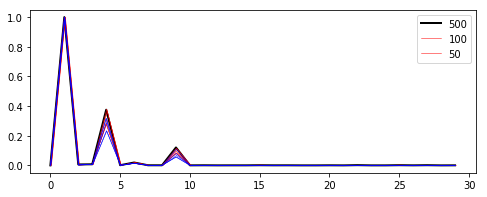

[1 4]
{'prominences': array([0.99999589, 0.22651219]), 'left_bases': array([0, 2]), 'right_bases': array([23, 23])}
done


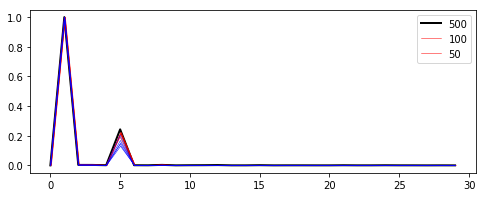

[1 5]
{'prominences': array([0.99999981, 0.15098704]), 'left_bases': array([0, 4]), 'right_bases': array([25, 25])}
done


In [37]:
runLLRsubsamp(evecs_in.copy())
runLLRsubsamp(evecs_out.copy())

In [38]:
def plotLLRresRK(ressy1,smadsnail,scalevec,promval):
    
    from matplotlib import rc
    rc('text', usetex=False)
    #eps_scale of 3 , cutoff of 0.05
    #eps_scale of 6 is best when more n_evecs are considered
    cycle=int(-1)
    for i in scalevec:
        cycle=cycle+1
        rrr = ressy1[int(cycle),:]
        chosenimensiontuple,properties = scipy.signal.find_peaks(rrr, height=None, threshold=None, distance=None, prominence=promval, width=None, wlen=None, rel_height=0.5, plateau_size=None)
        chosenimensions = np.asarray(chosenimensiontuple).reshape(-1,)
        plt.figure(figsize=(4,1.5))
        plt.plot(rrr)
        ridx = chosenimensions
        x = np.linspace(0,len(rrr)-1,len(rrr))

        plt.plot(x[ridx],rrr[ridx],'ro')
        plt.title('Local Linear Regression, '+smadsnail+' , eps_scale=' + str(np.round(i,2)))
#         rridx0 = np.where(ridx==True)
#         print(chosenimensions)
        rridx = list(chosenimensions)
        for h in rridx:
            tx= int(x[h])
            ty = rrr[h]
            ts = str(np.round(ty,2))
            t = plt.text(tx+0.2,ty,tx)
#         print('epsscale,',str(np.round(i,2)),'--rval,', rrr[ridx])
#     print(x[ridx])
    plt.ylabel("$r_k$",fontsize=15)
    plt.xlabel('DMAP dimension',fontsize=12)
    plt.ylim(0,1.2)
    plt.show()

    
    ev_in = x[ridx]
    ev_in = [int(x) for x in ev_in]
    

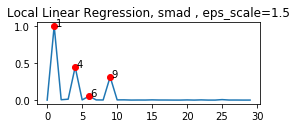

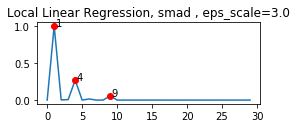

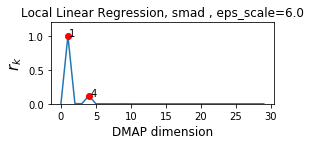

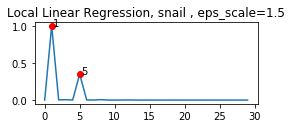

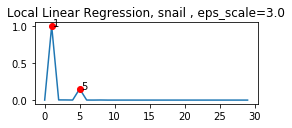

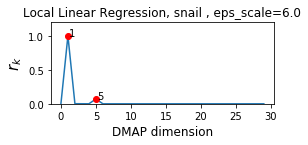

In [39]:
plotLLRresRK(ressy1,'smad',scalevec,promval)
plotLLRresRK(ressy2,'snail',scalevec,promval)

In [40]:
# print(scalevec[3])
peaks,properties = scipy.signal.find_peaks(ressy1[-1,:], height=None, threshold=None, distance=None, prominence=0.1, width=None, wlen=None, rel_height=0.5, plateau_size=None)
# print(peaks)
# print(properties)

In [41]:
#choose important eigenvectors
# ev_in = goodinputs.astype(int).copy() # important eigenvectors for input, determined visually from previous plots
# ev_in = ev_in[2]
# ev_out = goodoutputs.astype(int).copy() # important eigenvectors for output, determined visually from previous plots
# ev_out = ev_out[1]
print("ev_in",ev_in)
print("ev_out",ev_out)

ev_in [1 4 9]
ev_out [1 5]


In [42]:
# evecs_out = evecs_out*-1
# evecs_in[:,1] = evecs_in[:,1]*-1
# evecs_in[:,4] = evecs_in[:,4]*-1
# evecs_out = 

In [43]:
#save these as CSV files so you don't have to run it again and again

savepath = str(cwd) + '/' + csvsavepath
print(savepath)
if not os.path.exists(savepath):
    os.makedirs(savepath)

    

a = numpy.asarray(evecs_in)
numpy.savetxt(savepath+"evecs_in.csv", a, delimiter=",")
a = numpy.asarray(evals_in)
numpy.savetxt(savepath+"evals_in.csv", a, delimiter=",")
a = numpy.asarray(ev_in)
numpy.savetxt(savepath+"ev_in.csv", a, delimiter=",")


a = numpy.asarray(evecs_out)
numpy.savetxt(savepath+"evecs_out.csv", a, delimiter=",")
a = numpy.asarray(evals_out)
numpy.savetxt(savepath+"evals_out.csv", a, delimiter=",")
a = numpy.asarray(ev_out)
numpy.savetxt(savepath+"ev_out.csv", a, delimiter=",")

a = numpy.asarray(eps_in)
numpy.savetxt(savepath+"eps_in.csv", a, delimiter=",")
a = numpy.asarray(eps_in)
numpy.savetxt(savepath+"eps_out.csv", a, delimiter=",")

/Users/frick/Dparams/DParamsFinal_v4/_dmap_csv_expSYST2_PCtcutmdl_S3conc_CAGAconc_gpy_-DIFF-positive_LLRpeakfinder_CLEAN-AGNOSTIC-ztosqrtResampleCAGAclean/


In [44]:
#load the CSV files
savepath = str(cwd) + '/' + csvsavepath

evecs_in_csv = np.genfromtxt(savepath+"evecs_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
evecs_out_csv = np.genfromtxt(savepath+"evecs_out.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")

evals_in_csv = np.genfromtxt(savepath+"evals_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
evals_out_csv = np.genfromtxt(savepath+"evals_out.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")

eps_in_csv = np.genfromtxt(savepath+"eps_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
eps_out_csv = np.genfromtxt(savepath+"eps_out.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")

ev_in_csv = np.genfromtxt(savepath+"ev_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
ev_out_csv = np.genfromtxt(savepath+"ev_out.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")

In [45]:
#use this to load the CSV files for determined using SYST1
#if you are running SYST2 then load the SYST1 DMAP
if conditionid == 'expSYST2_PC':
    print('loading OG DMAP')
#     specid2 = 'mdl_S3conc_IFFLconc_gpy_GRAD-DIFF_nonZTOSQRT-positive_msemedian_forfig'
    specid2 = specid
    conditionid2 = 'expSYST1_PC'
    csvsavepath2 = '_dmap_csv_' + conditionid2 + cond2+ specid2 + 'clean/'

    #load the CSV files
    savepath = str(cwd) + '/' + csvsavepath2
    evecs_in_csv = np.genfromtxt(savepath+"evecs_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
    evals_in_csv = np.genfromtxt(savepath+"evals_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
    eps_in_csv = np.genfromtxt(savepath+"eps_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
    ev_in_csv = np.genfromtxt(savepath+"ev_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")

loading OG DMAP


In [46]:
evecs_in = evecs_in_csv
evecs_out = evecs_out_csv

evals_in = evals_in_csv
evals_out = evals_out_csv
ev_in = np.asarray(ev_in_csv,dtype='int').reshape(-1,)
ev_out = np.asarray(ev_out_csv,dtype='int').reshape(-1,)

eps_in = eps_in_csv
eps_out = eps_out_csv

In [47]:
print(evecs_out.shape)

(500, 30)


In [48]:
# evecs_in[:,ev_in[0]] = evecs_in[:,ev_in[0]]*-1

(500, 30)
ev_in [1 4 9]
ev_out [1 5]
0
1
2
3
0
1
2
3
done


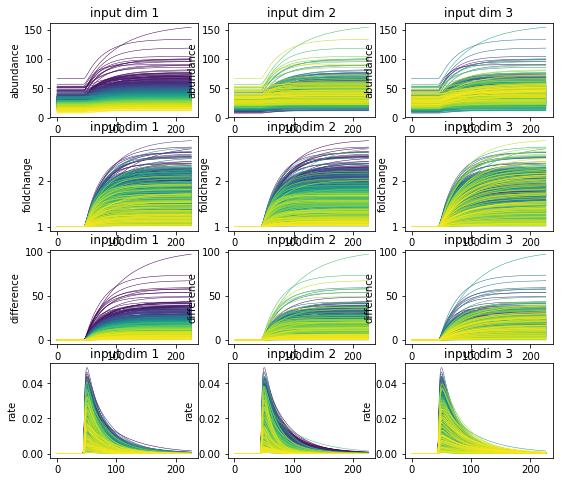

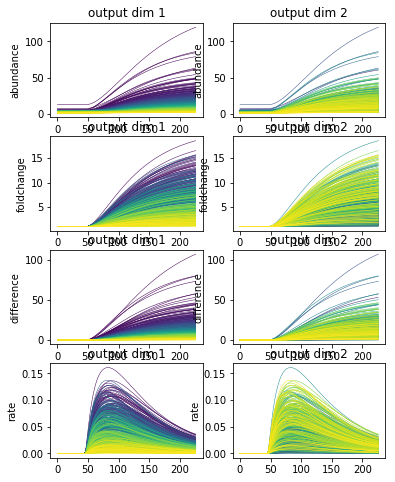

In [49]:
import accessory
importlib.reload(accessory)
# from accessory import plot_trajectories_based_on_dparam
# importlib.reload(accessory)
# from accessory import *
# ev_in = [1,4,11]
# ev_out = [1,7,11]

print(evecs_out.shape)
print('ev_in',ev_in)
print('ev_out',ev_out)
plot_trajectories_based_on_dparam(time_data,ogdin,evecs_in,ev_in,'input')
plot_trajectories_based_on_dparam(time_data,ogdout,evecs_out,ev_out,'output')

# plot_trajectories_based_on_dparam(tvec,traj,evecs_0,ev_0,strstr):
print('done')
# evecs_out[]

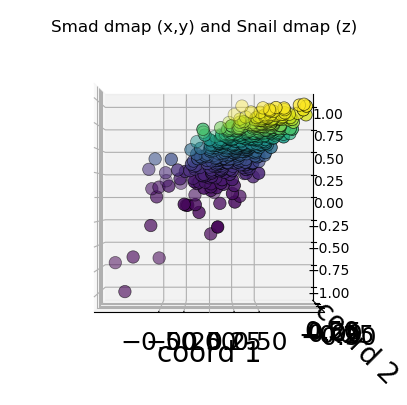

/Users/frick/Dparams/DParamsFinal_v4/2d-manifold_expSYST2_PCtcut/ snailC 3d man.png
done


In [50]:
savepath = str(cwd) + '/2d-manifold_' +conditionid+cond2+'/'
if not os.path.exists(savepath):
    os.makedirs(savepath)
    
fontsize=20
plt.style.use('default')
# plt.style.use('ggplot')   
fsize = (5,5)
msize = 80
lw = 0.5
cmap = plt.cm.viridis

fig = plt.figure(figsize=fsize)
ax = fig.add_subplot(111, projection='3d')
x = evecs_in[:,ev_in[0]].copy()
y = evecs_in[:,ev_in[1]].copy()
cc = evecs_out[:,ev_out[0]].copy()
z = cc.copy()
csort = np.argsort(cc)
cc = range(len(csort))
# cw = np.where(cc>0)
# cc[cw]=0
# csort = range(len(cc))
xx = x[csort]
yy = y[csort]
zz = z[csort]

xtickvec = np.linspace(-1,1,5)
ax.scatter(xx,yy,zz,c=cc,s=msize,edgecolor='k',linewidths=lw, cmap = cmap)
plt.xlabel('coord 1',fontsize=fontsize)
plt.ylabel('coord 2',fontsize=fontsize)
plt.xticks(np.divide(xtickvec,2),fontsize=fontsize-2)
plt.yticks(np.divide(xtickvec,2),fontsize=fontsize-2)
plt.title('Smad dmap (x,y) and Snail dmap (z)')
savestr = savepath+' snailC 3d man.png'
plt.savefig(savestr,bbox_inches='tight')
ax.view_init(0,-90)
plt.show()

print(savestr)
print('done')

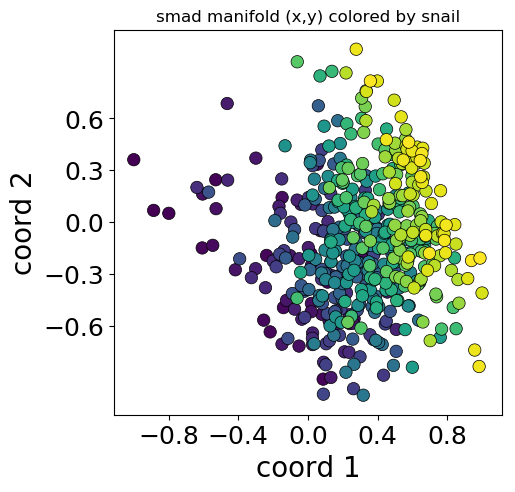

/Users/frick/Dparams/DParamsFinal_v4/2d-manifold_expSYST2_PCtcut/ smad manifold colored by snail.png
done


In [51]:

fig = plt.figure(figsize=fsize)
ax = fig.add_subplot(111)


ax.scatter(xx,yy,c=cc,s=msize,edgecolor='k',linewidths=lw, cmap = cmap)
plt.xlabel('coord 1',fontsize=fontsize)
plt.ylabel('coord 2',fontsize=fontsize)
plt.title('smad manifold (x,y) colored by snail')

xtickvec= np.linspace(-1.6,1.6,5)
plt.xticks(np.divide(xtickvec,2),fontsize=fontsize-2)
xtickvec= np.linspace(-1.2,1.2,5)
plt.yticks(np.divide(xtickvec,2),fontsize=fontsize-2)
savestr = savepath+' smad manifold colored by snail.png'
plt.savefig(savestr,bbox_inches='tight')

plt.show()

print(savestr)
print('done')

[1 5]


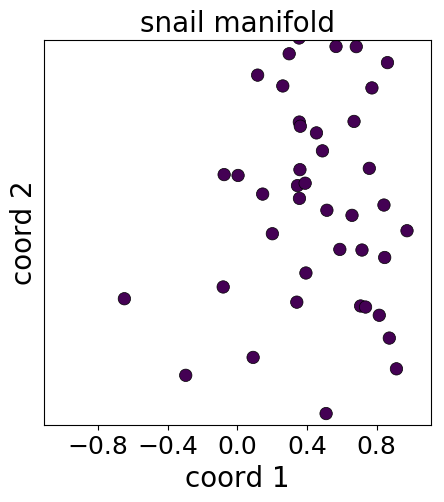

/Users/frick/Dparams/DParamsFinal_v4/2d-manifold_expSYST2_PCtcut/ Snail manifold colored by snail EXTRA.png
done


In [52]:

fig = plt.figure(figsize=fsize)
ax = fig.add_subplot(111)
print(ev_out)

xlabelstr = 'coord 1'
ylabelstr = 'coord 2'
if len(ev_out)>1:
    x = evecs_out[:,ev_out[0]].copy()
    y = evecs_out[:,ev_out[1]].copy()
else:
    x = np.asarray(range(evecs_out.shape[1])).reshape(-1,)
    y = evecs_out[:,ev_out[0]].copy()
    y = np.sort(y)
    x = np.argsort(y)
    xlabelstr = 'cell index'
    ylabelstr = 'coord 1'
    
if len(ev_out)>2:
    cc = evecs_out[:,ev_out[2]].copy()
    z = cc.copy()
    csort = np.argsort(cc)
    cc = range(len(csort))
    titlestr = 'snail manifold colored by snail'
else:
    cc = np.zeros(y.shape)
    titlestr = 'snail manifold'
    

xx = x[csort]
yy = y[csort]
zz = z[csort]

ax.scatter(xx,yy,c=cc,s=msize,edgecolor='k',linewidths=lw, cmap = cmap)
plt.xlabel(xlabelstr,fontsize=fontsize)
plt.ylabel(ylabelstr,fontsize=fontsize)
plt.title(titlestr,fontsize=fontsize)

if len(ev_out)>1:
    xtickvec= np.linspace(-1.6,1.6,5)
    plt.xticks(np.divide(xtickvec,2),fontsize=fontsize-2)
    xtickvec= np.linspace(-1.2,1.2,5)
    plt.yticks(np.divide(xtickvec,2),fontsize=fontsize-2)

    ym = np.median(y[:])
    yst = np.std(y[:])
    stdf=0.1
    yl = [ym - yst*stdf,ym + yst*stdf]
    plt.ylim(yl)

savestr = savepath+' Snail manifold colored by snail EXTRA.png'
plt.savefig(savestr,bbox_inches='tight')
plt.show()

print(savestr)
print('done')

In [53]:
# whos

In [54]:
import dill as pickle;
from pathlib import Path
# import os

# cwd = Path().resolve()
# print(cwd)
# repo = str(cwd) +'/'

session_savepath = 'session' + conditionid + specid + 'clean/'
session_path = repo + session_savepath

print(not (os.path.isdir(session_path)))
if not (os.path.isdir(session_path)):
    print('making' + session_path + '...')
    os.mkdir(session_path)

session_name = 'seshy'
savename = session_path + session_name

pickle.dump_session(savename)
print(savename)
print('pickle success!!!')

False
/Users/frick/Dparams/DParamsFinal_v4/sessionexpSYST2_PCmdl_S3conc_CAGAconc_gpy_-DIFF-positive_LLRpeakfinder_CLEAN-AGNOSTIC-ztosqrtResampleCAGAclean/seshy
pickle success!!!


In [55]:
# import dill as pickle;
# from pathlib import Path

# # cwd = Path().resolve()
# # print(cwd)
# # repo = str(cwd) +'/'

# session_savepath = 'session' + conditionid + specid + 'clean/'
# session_path = repo + session_savepath
# session_name = 'sesh'
# savename = session_path + session_name


# pickle.load_session(savename)
# print(ev_in)

# first attempt to use the original DMAPS [1,3] and [1] using GPy

In [56]:
# ev_in = [1,3]
# ev_out = [1]

In [57]:
print(ev_in)
print(ev_out)

[1 4 9]
[1 5]


In [58]:
def msefunc(xp,Y):
    mseeach={}
    Yscale = np.zeros(Y.shape)
    xpscale = np.zeros(Y.shape)
    for i in range(0,Y.shape[1]):
        Yscale[:,i] = (Y[:,i]-np.mean(Y[:,i]))/np.std(Y[:,i])
        xpscale[:,i] = (xp[:,i]-np.mean(xp[:,i]))/np.std(xp[:,i])
        mseeach[i]=np.mean((Yscale[:,i]-xpscale[:,i])**2)
    scalex = xpscale
    scaley = Yscale
    mse = np.mean((Yscale-xpscale)**2)
    return scalex,scaley, mse, mseeach

In [59]:
import GPy
#use Smad Manifold to predicut Smad trajectories (1 timepoint)

# sample inputs and outputs
X = evecs_in[:,ev_in]
if len(ev_in)==1:
    X = evecs_in[:,ev_in].reshape(-1,1)


Y = ogdin[:,10].reshape(-1,1) #reshape to look like a 2d input
print(Y.shape)
kerndim = X.shape[1]
ker = GPy.kern.Matern52(kerndim,ARD=True) + GPy.kern.White(kerndim)

# create simple GP model
m = GPy.models.GPRegression(X,Y,ker)

# optimize and plot
m.optimize(messages=True,max_f_eval = 1000)

(500, 1)


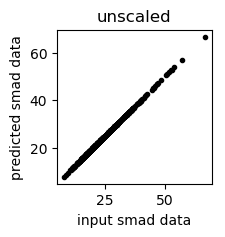

mse =  3.605694088705681e-06


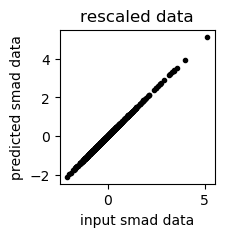

rescaled mse =  3.6054797687769807e-06
{0: 3.6054797687769807e-06}


In [60]:
#can we predict input data well?
xp,xstd = m.predict(X)
# print(xp)

x1 = Y
y1= xp

fig = plt.figure(figsize=(2,2))
plt.scatter(x1,y1,c='k',marker='.')
plt.xlabel('input smad data')
plt.ylabel('predicted smad data')
plt.title('unscaled')
plt.show()
#mse is deviation from identity
mse = np.mean(((x1/np.std(x1))-(y1/np.std(y1)))**2)
print('mse = ',mse.copy())

x1,y1, mse, mseeach = msefunc(xp,Y)


fig = plt.figure(figsize=(2,2))
plt.scatter(x1,y1,c='k',marker='.')
plt.xlabel('input smad data')
plt.ylabel('predicted smad data')
plt.title('rescaled data')
plt.show()
print('rescaled mse = ',mse)
print(mseeach.copy())


In [61]:
def Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr):
    kerndim = X.shape[1]
    ker = GPy.kern.Matern52(kerndim,ARD=True) + GPy.kern.White(kerndim)

    # create simple GP model
    m = GPy.models.GPRegression(X,Y,ker)

    # optimize and plot
    m.optimize(messages=messages,max_f_eval = max_f_eval)
    return m
    
def Gpy_mse_plot(m,X,Y,inputstr,outputstr):
    xp,xstd = m.predict(X)
    x1,y1, mse, mseeach = msefunc(xp,Y)
    msev = np.asarray(list(mseeach.values())).reshape(-1,)
    x1s = x1.shape[1]
    ws = 1
    fig = plt.figure(figsize=((4 + (ws*(x1s-1)))*x1s,4))
    for i in range(0,x1.shape[1]):
        x = x1[:,i]
        y = y1[:,i]
        if x1.shape[1]==1:
            plt.scatter(x,y,c='k',marker='.')
            plt.xlabel('orig.' + outputstr)
            plt.ylabel('pred.' + outputstr)
        else:
            ax = fig.add_subplot(1,x1s,i+1)
            ax.scatter(x,y,c='k',marker='.')
            plt.xlabel('orig.' + outputstr)
            plt.ylabel('pred.' + outputstr)
        if x1.shape[1]>1:
            plt.title('predict ' + outputstr + ' dim-' + str(i+1) + ' based on ' + inputstr)
        else:
            plt.title('predict ' + outputstr + ' based on ' + inputstr)
        ax = plt.gca()
        t = ax.text(0.01,0.99,'rescaled mse = ',transform=ax.transAxes, horizontalalignment='left',verticalalignment='top')
        t = ax.text(0.01,0.95,str(np.round(msev[i],5)),transform=ax.transAxes, horizontalalignment='left',verticalalignment='top')
    plt.show()
    return mseeach

In [62]:
def predSpecificBasedOnDMAP(time_data,ss1,ss2,X,X2,sdat1,sdat2):
    msekeeper={}
    import GPy
    #use Smad Manifold to predicut Smad trajectories (1 timepoint)
    # sample inputs and outputs
    max_f_eval = 1000
    messages=False
    inputstr = ss1 + ' dmaps'
    tvec = time_data[1,:]
    basal = ((np.where(tvec<=0))[0])
    peak = ((np.where(tvec<=30))[0])[-1]

    X=X0.copy()
    outputstr = ss1 + ' tpoint'
    Y = sdat1[:,10].reshape(-1,1) #reshape to look like a 2d input
#     Y = sdat1[:,[5,10,15]]
    m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
    mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
    msekeeper[outputstr]=mseeach

    X=X0.copy()
    outputstr = ss1 + ' max relative rate'
    
    rate=np.zeros(sdat1.shape[0])
    for j in range(sdat1.shape[0]):
        rate[j] = np.max(sdat1[j,:]/np.median(sdat1[j,basal]))

    Y = rate.reshape(-1,1) #reshape to look like a 2d input
    m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
    mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
    msekeeper[outputstr]=mseeach


    X=X0.copy()
    outputstr = ss1 + ' maximum integral'
    rate=np.zeros(sdat1.shape[0])
    for j in range(sdat1.shape[0]):
        rate[j] = np.max(np.cumsum(sdat1[j,:]))

    Y = rate.reshape(-1,1) #reshape to look like a 2d input
    m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
    mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
    msekeeper[outputstr]=mseeach


    X=X0.copy()
    outputstr = ss1 + ' foldchange at tpeak'
    foldchange = sdat1[:,peak]/np.median(sdat1[:,basal])
    Y = foldchange.reshape(-1,1) #reshape to look like a 2d input
    m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
    mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
    msekeeper[outputstr]=mseeach

    X = X0.copy()
    outputstr = ss1 + ' difference at tpeak'
    foldchange = sdat1[:,peak]-np.median(sdat1[:,basal])
    Y = foldchange.reshape(-1,1) #reshape to look like a 2d input
    m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
    mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
    msekeeper[outputstr]=mseeach


    X=X0.copy()
    outputstr = ss2 + ' difference'
    snaildiff = sdat2[:,peak]-np.median(sdat2[:,basal])
    Y = snaildiff.reshape(-1,1) #reshape to look like a 2d input
    m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
    mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
    msekeeper[outputstr]=mseeach

    X=X0.copy()
    outputstr = ss2 + ' dmap'
    Y = X2.copy()
    m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
    mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
    msekeeper[outputstr]=mseeach
    
    for v in range(X.shape[1]):
        print(v)
#         outputstr = ss2 + ' dmap, using ' +ss1+ ' ' +str(list(range(1,v+2)))
        inputstr0 = ss1 + ' ' + str(list(range(1,v+2)))
        print(inputstr0)
        X=X0.copy()
        Y = X2.copy()
        m = Gpymadness(X[:,0:v+1],Y,messages,max_f_eval,inputstr0,outputstr)
        mseeach = Gpy_mse_plot(m,X,Y,inputstr0,outputstr)
        msekeeper[outputstr]=mseeach
        
    return msekeeper


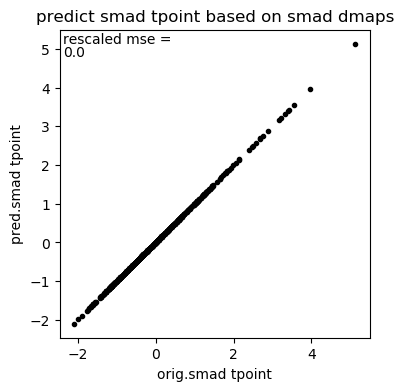

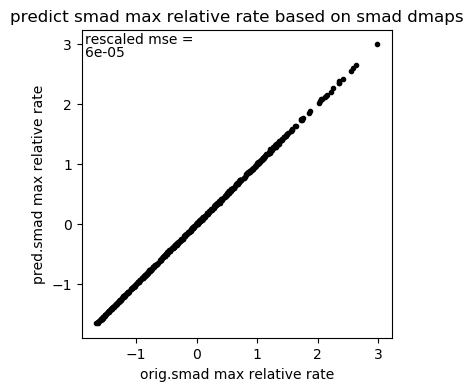

 /Users/frick/anaconda/lib/python3.6/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /Users/frick/anaconda/lib/python3.6/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add
 /Users/frick/anaconda/lib/python3.6/site-packages/GPy/kern/src/stationary.py:551: RuntimeWarning:invalid value encountered in multiply


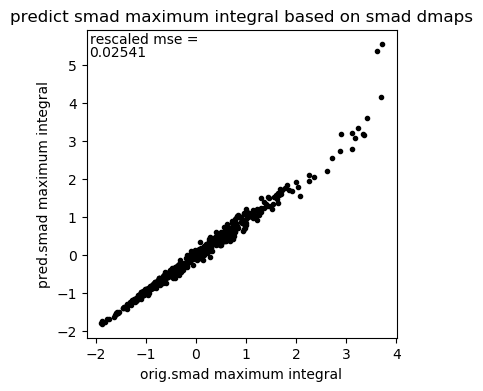

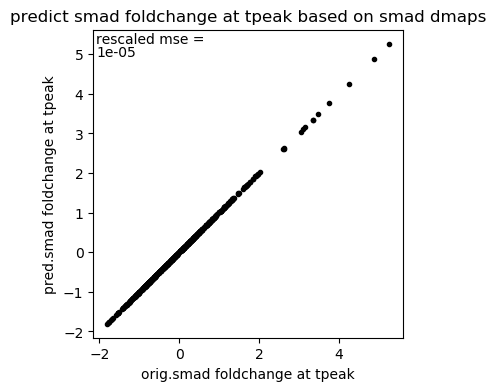

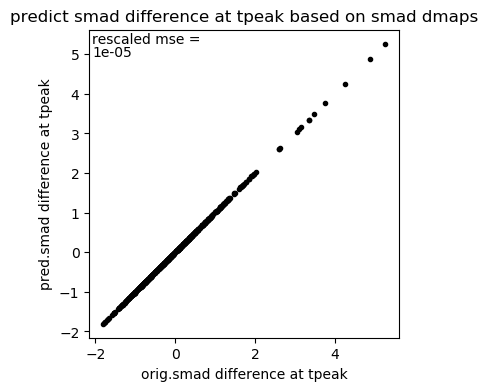

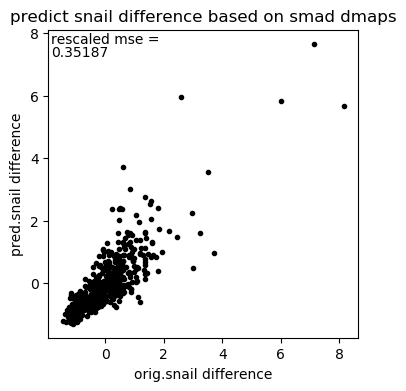

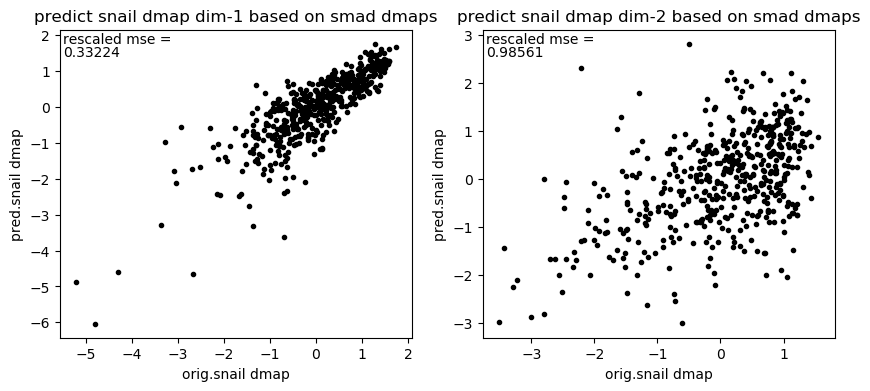

0
smad [1]


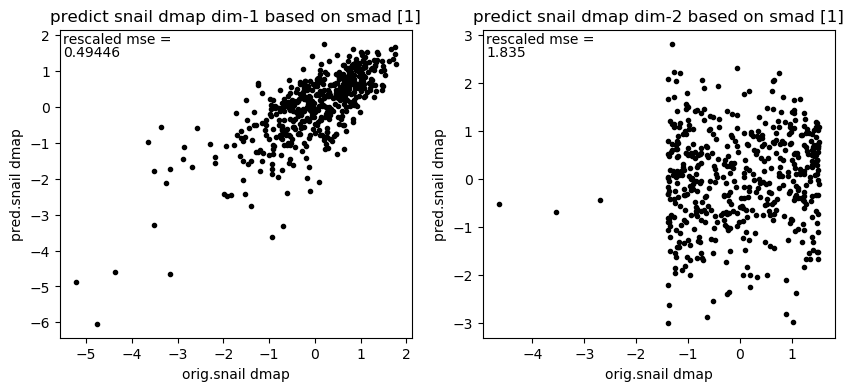

1
smad [1, 2]


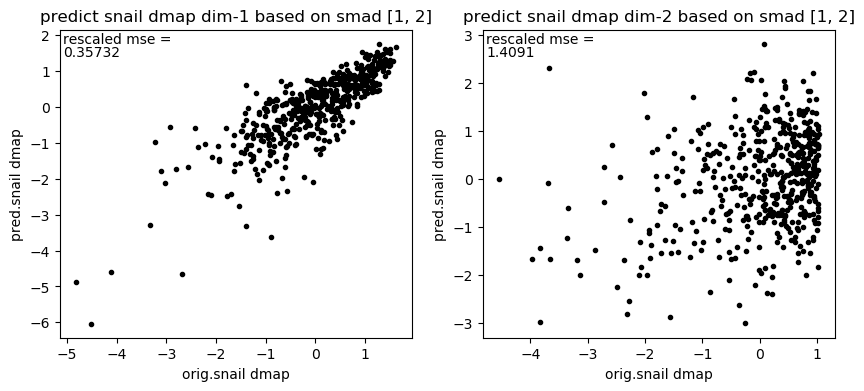

2
smad [1, 2, 3]


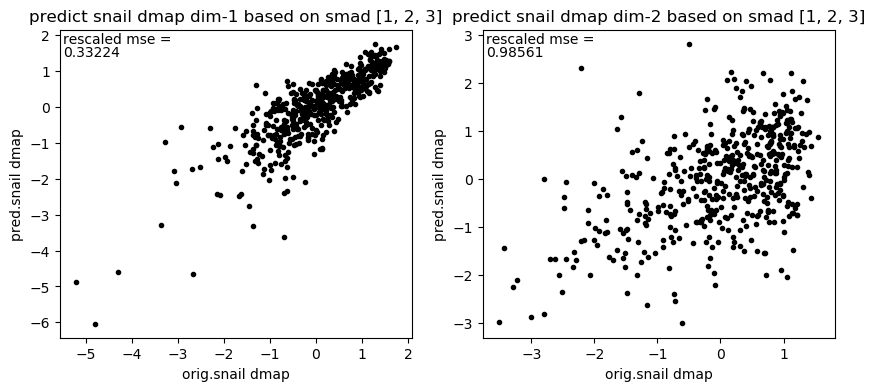

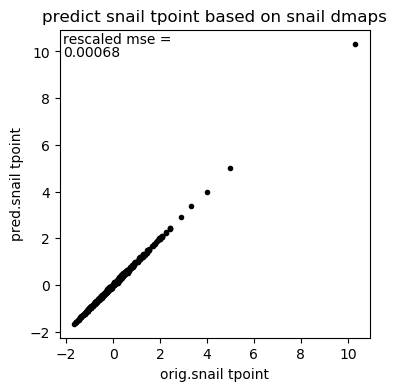

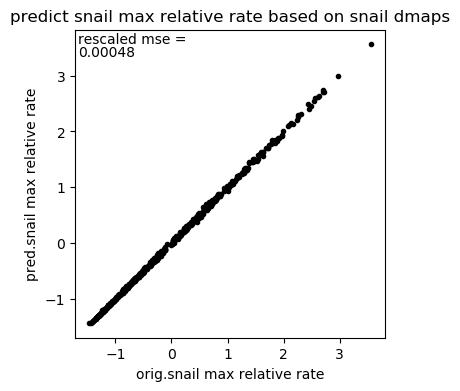

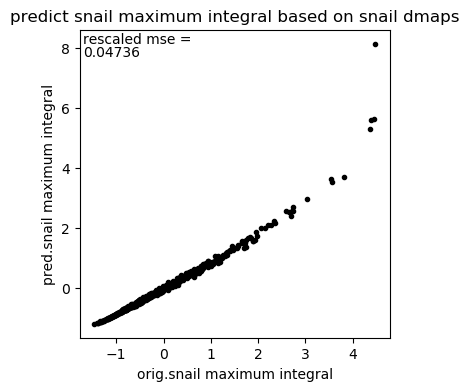

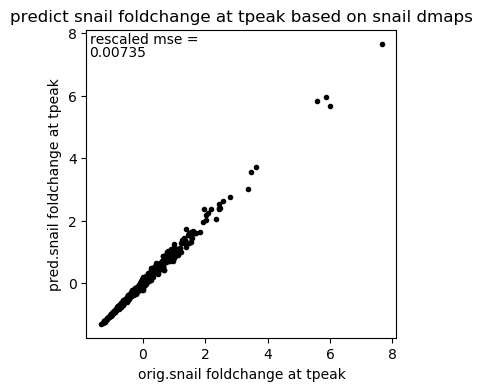

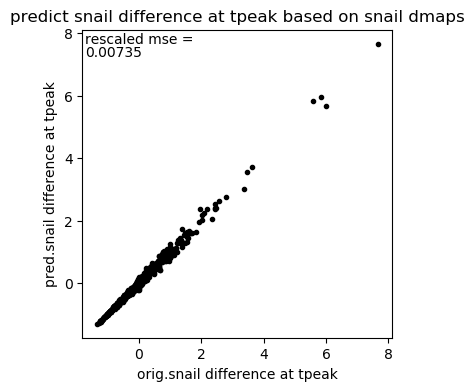

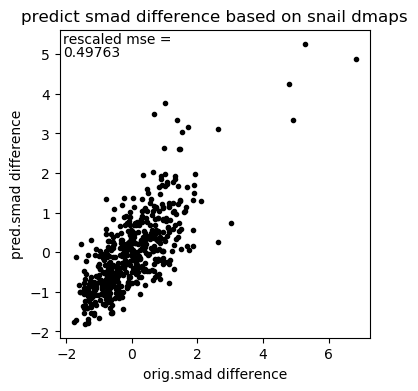

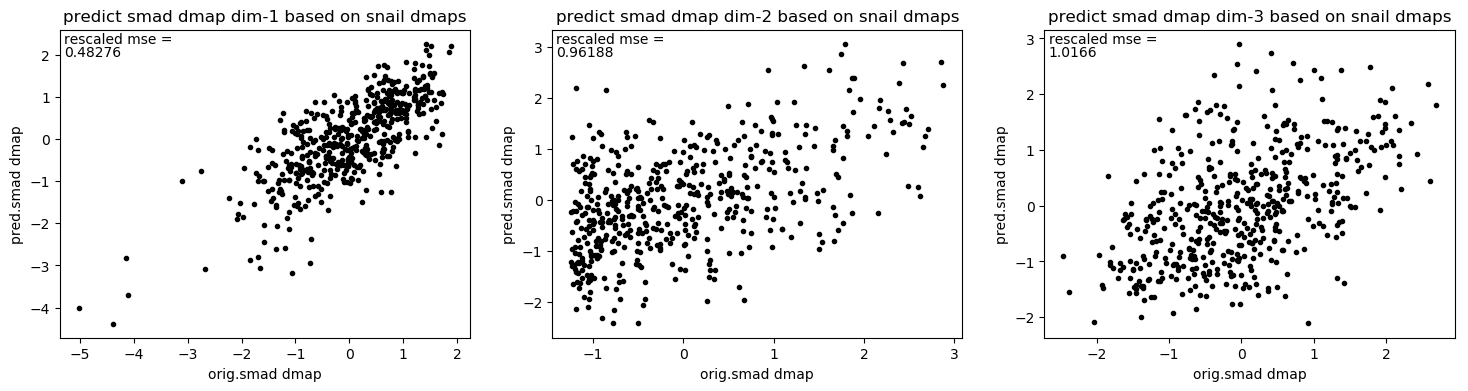

0
snail [1]


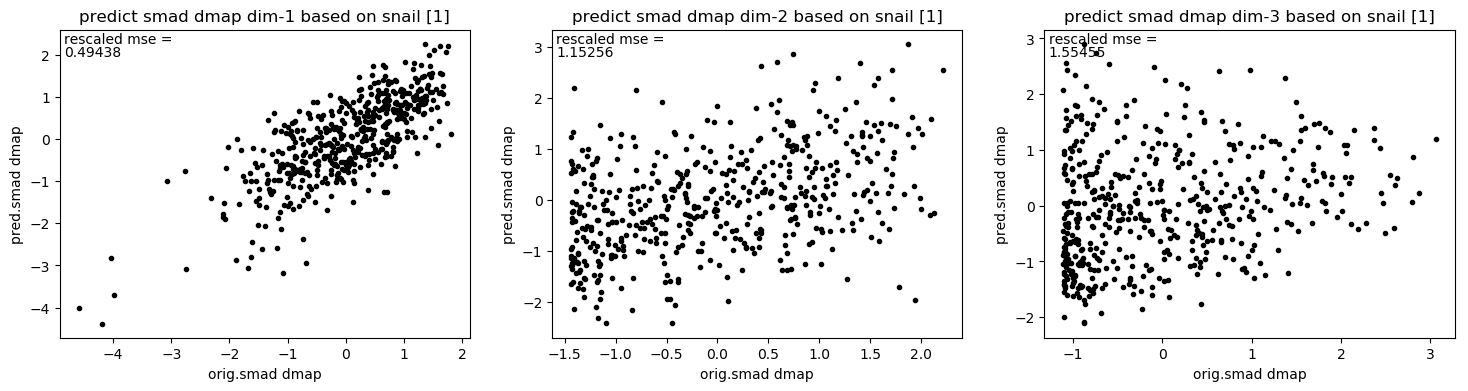

1
snail [1, 2]


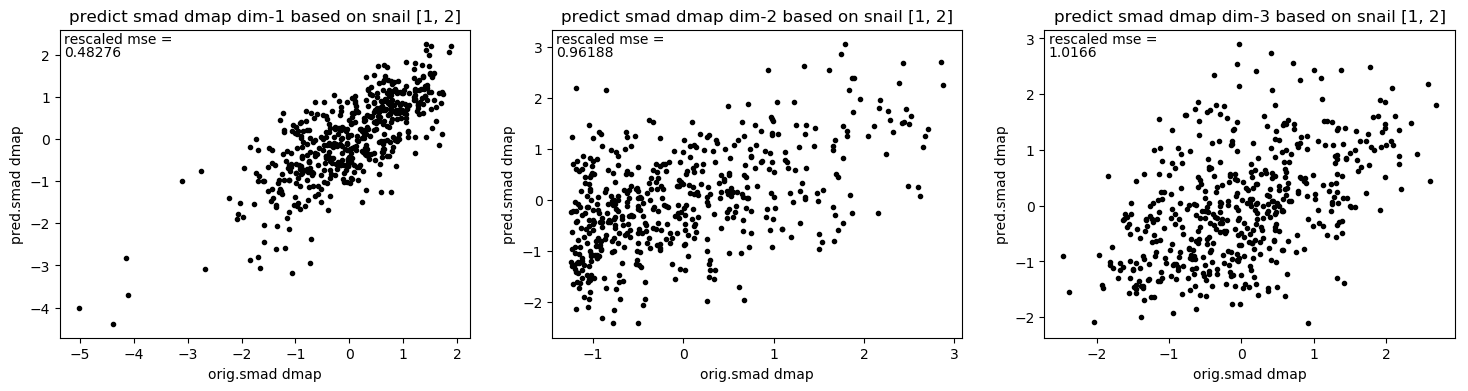

In [63]:
#predictions based on Smad
ss1 = 'smad'
ss2 = 'snail'
X = evecs_in[:,ev_in].copy()
X0=X.copy()
sdat1 = ogdin.copy()
sdat2 = ogdout.copy()
X2 = evecs_out[:,ev_out].copy()
msekeepersmad = predSpecificBasedOnDMAP(time_data,ss1,ss2,X,X2,sdat1,sdat2)

ss1 = 'snail'
ss2 = 'smad'
X = evecs_out[:,ev_out].copy()
X0=X.copy()
sdat1 = ogdout.copy()
sdat2 = ogdin.copy()
X2 = evecs_in[:,ev_in].copy()
msekeepersnail = predSpecificBasedOnDMAP(time_data,ss1,ss2,X,X2,sdat1,sdat2)

In [64]:
def Gpy_eachtpoint(X,Yin0,samp_vec,messages,max_f_eval,inputstr,outputstr):
    Yin = Yin0[:,samp_vec]
    msearray = np.zeros(Yin.shape[1])
    for j in range(0,Yin.shape[1]):
        Y = Yin[:,j].reshape(-1,1)

        max_f_eval = 1000
        messages=False
        m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)

        xp,xstd = m.predict(X)
        x = Y
        y = xp
        x1,y1, mse, mseeach = msefunc(xp,Y)
        msearray[j]=mse
        print(j, end=" " )
    print('completed' + inputstr + outputstr)
    return msearray


In [65]:


time_vec = time_data[1,:]
tsample = 3
tsamp = np.min([tsample,len(time_vec)])

print(len(time_vec))

axfact = 5

ax1 = np.ceil(len(time_vec)/2) - np.ceil(len(time_vec)/5)
ax2 = np.ceil(len(time_vec)/2) + np.ceil(len(time_vec)/5)
samp_vec = np.linspace(ax1,ax2,tsamp,dtype='int32')
print(samp_vec)
print(time_vec[samp_vec])


227
[ 68 114 160]
[15.5556 45.9462 76.338 ]


In [66]:
def make_samp_vec(Yin):
    ltv = Yin.shape[1]
    ax1 = np.ceil(ltv/2) - np.ceil(ltv/5)
    ax2 = np.ceil(ltv/2) + np.ceil(ltv/5)
    samp_vec = np.linspace(ax1,ax2,tsamp,dtype='int32')
    return samp_vec

In [67]:

def gpy_each_timepoint(inputstr,X,fsmad,fsmadpro,snaildat,ss1,ss2):
    #attempt to predict input data at all timepoints using Smad Dmaps
    msecombo={} #initialize the master msecombo
    max_f_eval = 1000
    messages = False

    ## run each
    outputstr = ss1 + ' at each tpoint'
    Yin = fsmad
    samp_vec = make_samp_vec(Yin)
    msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
    msecombo[outputstr] = msearray


    outputstr = ss2 + ' at each tpoint'
    Yin = snaildat
    samp_vec = make_samp_vec(Yin)
    msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
    msecombo[outputstr] = msearray


    outputstr = 'f('+ss1+')'
    Z = fsmad.copy()
    mu, sigma = 0, 0.0 # mean and standard deviation
    for j in range(0,fsmad.shape[1]):
        s = np.random.normal(mu, sigma, fsmad.shape[0])
        Z[:,j] = (fsmad[:,j]**2) + s

    Yin = removeAllzerotpoints(Z.copy())
    samp_vec = make_samp_vec(Yin)
    msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
    msecombo[outputstr] = msearray

    
    outputstr = 'f('+ss1+')+smallnoise'
    Z = fsmad.copy()
    mu, sigma = 0, 0.01 # mean and standard deviation
    for j in range(0,fsmad.shape[1]):
        s = np.random.normal(mu, sigma, fsmad.shape[0])
    #     s = np.random.lognormal(mean, sigma, size=fsmad.shape[0])
        Z[:,j] = (fsmad[:,j]**2) + s

    Yin = removeAllzerotpoints(Z.copy())
    samp_vec = make_samp_vec(Yin)
    msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
    msecombo[outputstr] = msearray

    
    outputstr = 'f('+ss1+')+mediumnoise'
    Z = fsmad.copy()
    mu, sigma = 0, 0.1 # mean and standard deviation
    for j in range(0,fsmad.shape[1]):
        s = np.random.normal(mu, sigma, fsmad.shape[0])
        Z[:,j] = (fsmad[:,j]**2) + s

    Yin = removeAllzerotpoints(Z.copy())
    samp_vec = make_samp_vec(Yin)
    msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
    msecombo[outputstr] = msearray
    
    
    outputstr = 'f('+ss1+'_processed)'
    Z = fsmadpro.copy()
    mu, sigma = 0, 0.0 # mean and standard deviation
    for j in range(0,fsmadpro.shape[1]):
        s = np.random.normal(mu, sigma, fsmadpro.shape[0])
        Z[:,j] = (fsmadpro[:,j]**2) + s

    Yin = removeAllzerotpoints(Z.copy())
    samp_vec = make_samp_vec(Yin)
    msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
    msecombo[outputstr] = msearray
    
    outputstr = 'f('+ss1+'_processed)+s_noise'
    Z = fsmadpro.copy()
    mu, sigma = 0, 0.01 # mean and standard deviation
    for j in range(0,fsmadpro.shape[1]):
        s = np.random.normal(mu, sigma, fsmadpro.shape[0])
        Z[:,j] = (fsmadpro[:,j]**2) + s

    Yin = removeAllzerotpoints(Z.copy())
    samp_vec = make_samp_vec(Yin)
    msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
    msecombo[outputstr] = msearray
    
    outputstr = 'f('+ss1+'_processed)+m_noise'
    Z = fsmadpro.copy()
    mu, sigma = 0, 0.1 # mean and standard deviation
    for j in range(0,fsmadpro.shape[1]):
        s = np.random.normal(mu, sigma, fsmadpro.shape[0])
        Z[:,j] = (fsmadpro[:,j]**2) + s


    Yin = removeAllzerotpoints(Z.copy())
    samp_vec = make_samp_vec(Yin)
    msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
    msecombo[outputstr] = msearray


    outputstr = 'noise only'
    Z = fsmad.copy()
    samp_vec = make_samp_vec(Yin)
    mu, sigma = 0, 1 # mean and standard deviation
    for j in range(0,fsmad.shape[1]):
        s = np.random.normal(mu, sigma, fsmad.shape[0])
        Z[:,j] = s

    Yin = Z
    msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
    msecombo[outputstr] = msearray
    return msecombo

In [68]:
# msecombosmad = msecombo.copy()
inputstr = 'smad dmap'
X = evecs_in[:,ev_in].copy()
fsmad = reducedimensionalityforGPy(ogdin.copy())
fsmadpro = reducedimensionalityforGPy(observed_data_in.copy())
snaildat = reducedimensionalityforGPy(ogdout.copy())
ss1 = 'smad'
ss2 = 'snail'
msecombosmad = gpy_each_timepoint(inputstr,X,fsmad,fsmadpro,snaildat,ss1,ss2)


0 1 2 completedsmad dmapsmad at each tpoint
0 1 2 completedsmad dmapsnail at each tpoint
0 1 2 completedsmad dmapf(smad)
0 1 2 completedsmad dmapf(smad)+smallnoise
0 1 2 completedsmad dmapf(smad)+mediumnoise
0 1 2 completedsmad dmapf(smad_processed)
0 1 2 completedsmad dmapf(smad_processed)+s_noise
0 1 2 completedsmad dmapf(smad_processed)+m_noise
0 1 2 completedsmad dmapnoise only


In [69]:
inputstr = 'snail dmap'
X = evecs_out[:,ev_in].copy()
fsmad = reducedimensionalityforGPy(ogdout.copy())
fsmadpro = reducedimensionalityforGPy(observed_data_out.copy())
snaildat = reducedimensionalityforGPy(ogdin.copy())
ss1 = 'snail'
ss2 = 'smad'
msecombosnail = gpy_each_timepoint(inputstr,X,fsmad,fsmadpro,snaildat,ss1,ss2)


0 1 2 completedsnail dmapsnail at each tpoint
0 1 2 completedsnail dmapsmad at each tpoint
0 1 2 completedsnail dmapf(snail)
0 1 2 completedsnail dmapf(snail)+smallnoise
0 1 2 completedsnail dmapf(snail)+mediumnoise
0 1 2 completedsnail dmapf(snail_processed)
0 1 2 completedsnail dmapf(snail_processed)+s_noise


 /Users/frick/anaconda/lib/python3.6/site-packages/GPy/kern/src/stationary.py:244: RuntimeWarning:invalid value encountered in true_divide


0 1 2 completedsnail dmapf(snail_processed)+m_noise
0 1 2 completedsnail dmapnoise only


In [70]:
def msecomboplotter(tvec,msecombo,smadsnail,yl):
    plt.figure(figsize=(5,3))
    subkeep={}
    cycle=0
    for k in msecombo.keys():
        cycle=cycle+1
        v = msecombo[k]
      # k is now the key
      # v is the value
        subkeep[k]=v
        plt.semilogy(tvec+(cycle/100),v,'*-', label=k)
        
    plt.ylim(yl[0],yl[1])
    plt.ylabel('mean square error')
    plt.xlabel('time point, value')
    plt.title('error for different predictions based on '+ smadsnail + ' manifold') 
    plt.legend()
    plt.legend(loc='right',bbox_to_anchor=(1.8, 0.5))
    plt.show()
        
def msecombomedianplotter(msecombo,smadsnail):
    plt.figure(figsize=(6,3))
    msecombo2 = msecombo.copy()
    cycle=-1
    for k in msecombo.keys():
        y={}
        cycle=cycle+1
        v = msecombo[k]
        y[cycle] = np.median(v)
        msecombo2[k] = y

    cycle=-1
    for k in msecombo2.keys():
        cycle=cycle+1
        v = msecombo2[k]
      # k is now the key
      # v is the value
        y = v.values()
        if len(y)==1:
            x = cycle
            markerstr='o'
        else:
            x = np.linspace(cycle-0.1,cycle+0.1,len(y))
            markerstr='*-'
        plt.semilogy(x,y,markerstr, label=k)
        
            # plt.ylim(0.01,1)
    plt.ylabel('mean square error')
    plt.xlabel('attempted prediction')
    plt.title('error for different predictions based on ' + smadsnail + ' manifold') 
    plt.legend(loc='right',bbox_to_anchor=(1.5, 0.5))
    plt.show()
    
    
def msekeeperplotter(msekeeper2,yl,smadsnail):  
    cycle=-1
    plt.figure(figsize=(4,2))
    for k in msekeeper2.keys():
        cycle=cycle+1
        v = msekeeper2[k]
      # k is now the key
      # v is the value
        y = np.asarray(list(v.values())).reshape(-1,)
        if len(y)==1:
            x = cycle
            markerstr='o'
            msize = 7
            if y<yl[0]:
                x = cycle
                markerstr = 'v'
                print('edited value lower than,', yl[0])
                y = yl[0]*2
                msize=7
        else:
            x = np.linspace(cycle-0.1,cycle+0.1,len(y))
            markerstr='*-'
            msize=7
        plt.semilogy(x,y,markerstr, label=k, markersize = msize)

    plt.ylim(yl[0],yl[1])
    plt.ylabel('mean square error')
    plt.xlabel('attempted prediction')
    plt.title('error for different predictions based on ' + smadsnail + ' manifold') 
    plt.legend(loc='right',bbox_to_anchor=(1.8, 0.5))
    plt.show()

edited value lower than, 0.0001
edited value lower than, 0.0001
edited value lower than, 0.0001
edited value lower than, 0.0001


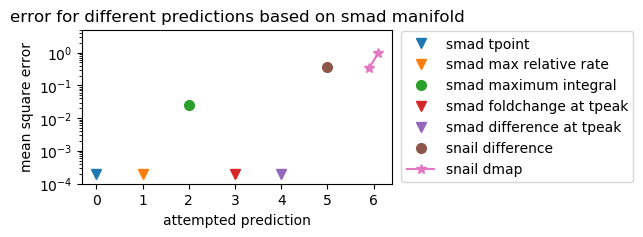

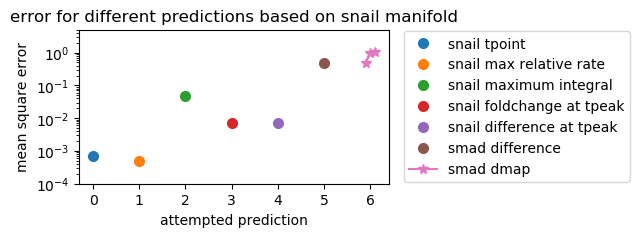

In [71]:
yl = [1e-4,5]
smadsnail='smad'
msekeeperplotter(msekeepersmad,yl,smadsnail)
smadsnail='snail'
msekeeperplotter(msekeepersnail,yl,smadsnail)
   

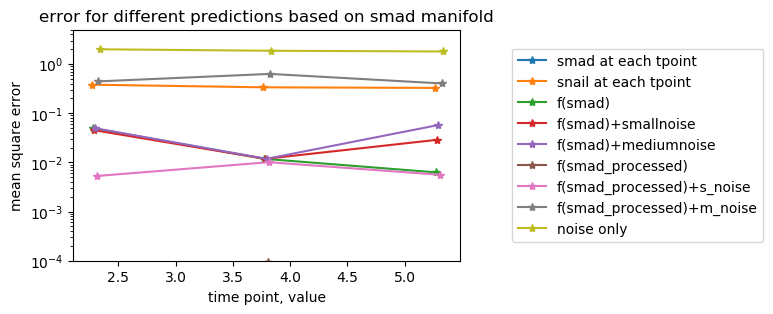

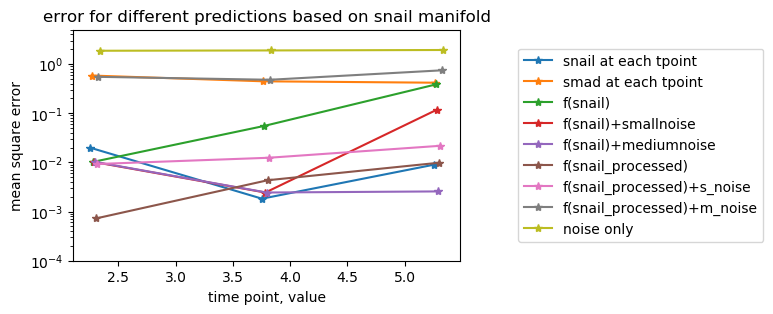

In [72]:


samp_vec = make_samp_vec(time_data_in)
tvec = time_data_in[1,:]
smadsnail = 'smad'
msecomboplotter(tvec[samp_vec]/60,msecombosmad,smadsnail,yl)
smadsnail = 'snail'
msecomboplotter(tvec[samp_vec]/60,msecombosnail,smadsnail,yl)

In [73]:
import dill as pickle;
from pathlib import Path
# import os

# cwd = Path().resolve()
# print(cwd)
# repo = str(cwd) +'/'

session_savepath = 'session' + conditionid + specid + 'clean/'
session_path = repo + session_savepath

print(not (os.path.isdir(session_path)))
if not (os.path.isdir(session_path)):
    print('making' + session_path + '...')
    os.mkdir(session_path)

session_name = 'seshyAfterGPy'
savename = session_path + session_name

pickle.dump_session(savename)
print(savename)
print('pickle success!!!')

False
/Users/frick/Dparams/DParamsFinal_v4/sessionexpSYST2_PCmdl_S3conc_CAGAconc_gpy_-DIFF-positive_LLRpeakfinder_CLEAN-AGNOSTIC-ztosqrtResampleCAGAclean/seshyAfterGPy
pickle success!!!
